# Differential Privacy: A Primer

*Richard Aw*

---

### Contents

<br>

<a href="#section0"><span style="color:black">0. <b>Why data privacy actually matters.</b></span></a>

<a href="#section1"><span style="color:black">1. <b>What is differential privacy?</b></span></a>

<a href="#section1_1"><p style="text-indent: 20px"><span style="color:black">1.1. What is differential about differential privacy?</span></p></a>

<a href="#section2"><span style="color:black">2. <b>Why differential privacy?</b></span></a>

<a href="#section2_1"><p style="text-indent: 20px"><span style="color:black">2.1. "Vanilla" anonymization</span></p></a>

<a href="#section2_2"><p style="text-indent: 20px"><span style="color:black">2.2. $k$-anonymization</span></p></a>

<a href="#section2_3"><p style="text-indent: 20px"><span style="color:black">2.3. Rules-based queries</span></p></a>

<a href="#section3"><span style="color:black">3. <b>How does differential privacy work?</b></span></a>

<a href="#section3_1"><p style="text-indent: 20px"><span style="color:black">3.1. What is a differentially private query mechanism?</span></p></a>

<a href="#section3_1_1"><p style="text-indent: 40px"><span style="color:black">3.1.1. <em>Conceptual definition</em></span></p></a>

<a href="#section3_1_2"><p style="text-indent: 40px"><span style="color:black">3.1.2. <em>Formal definition</em></span></p></a>

<a href="#section3_1_3"><p style="text-indent: 40px"><span style="color:black">3.1.3. <em>The role of $\epsilon$</em></span></p></a>

<a href="#section3_2"><p style="text-indent: 20px"><span style="color:black">3.2. How do we make a query mechanism differentially private?</span></p></a>

<a href="#section3_2_1"><p style="text-indent: 40px"><span style="color:black">3.2.1. <em>The Laplace Mechanism</em> (TBC)</span></p></a>

<a href="#section3_2_2"><p style="text-indent: 40px"><span style="color:black">3.2.2. <em>The Randomized Response Mechanism</em> (TBC)</span></p></a>

<a href="#section3_2_3"><p style="text-indent: 40px"><span style="color:black">3.2.3. <em>Matching the outputs of the two mechanisms</em> (TBC)</span></p></a>

<a href="#section4"><span style="color:black">4. <b>The advantages and drawbacks of differential privacy. (TBC)</b></span></a>

<a href="#section4_1"><p style="text-indent: 20px"><span style="color:black">4.1. The drawbacks (TBC)</span></p></a>

<a href="#section4_2"><p style="text-indent: 20px"><span style="color:black">4.2. The advantages (TBC)</span></p></a>

<a href="#conclusion"><span style="color:black"><b>Conclusion (TBC)</b></span></a>

---

<a id='section0'></a>
## 0. Why data privacy *actually* matters.

If you are reading this, chances are that you own accounts on digital services hosted by social media sites (e.g., Facebook, TikTok, etc.), financial institutions (e.g., JPMorgan, Venmo, etc.), e-commerce retailers (e.g., Amazon, Shopify, etc.), and so on so forth. And if you own accounts on these services, then the companies hosting these services must have sensitive information *about you* stored on their data servers. 


To some of us, this may already be a source of discomfort. Yet, many of us probably feel indifferent or helpless about it. After all, this is a sacrifice we agreed to make to enjoy the convenience of accessing these digital services at our fingertips.

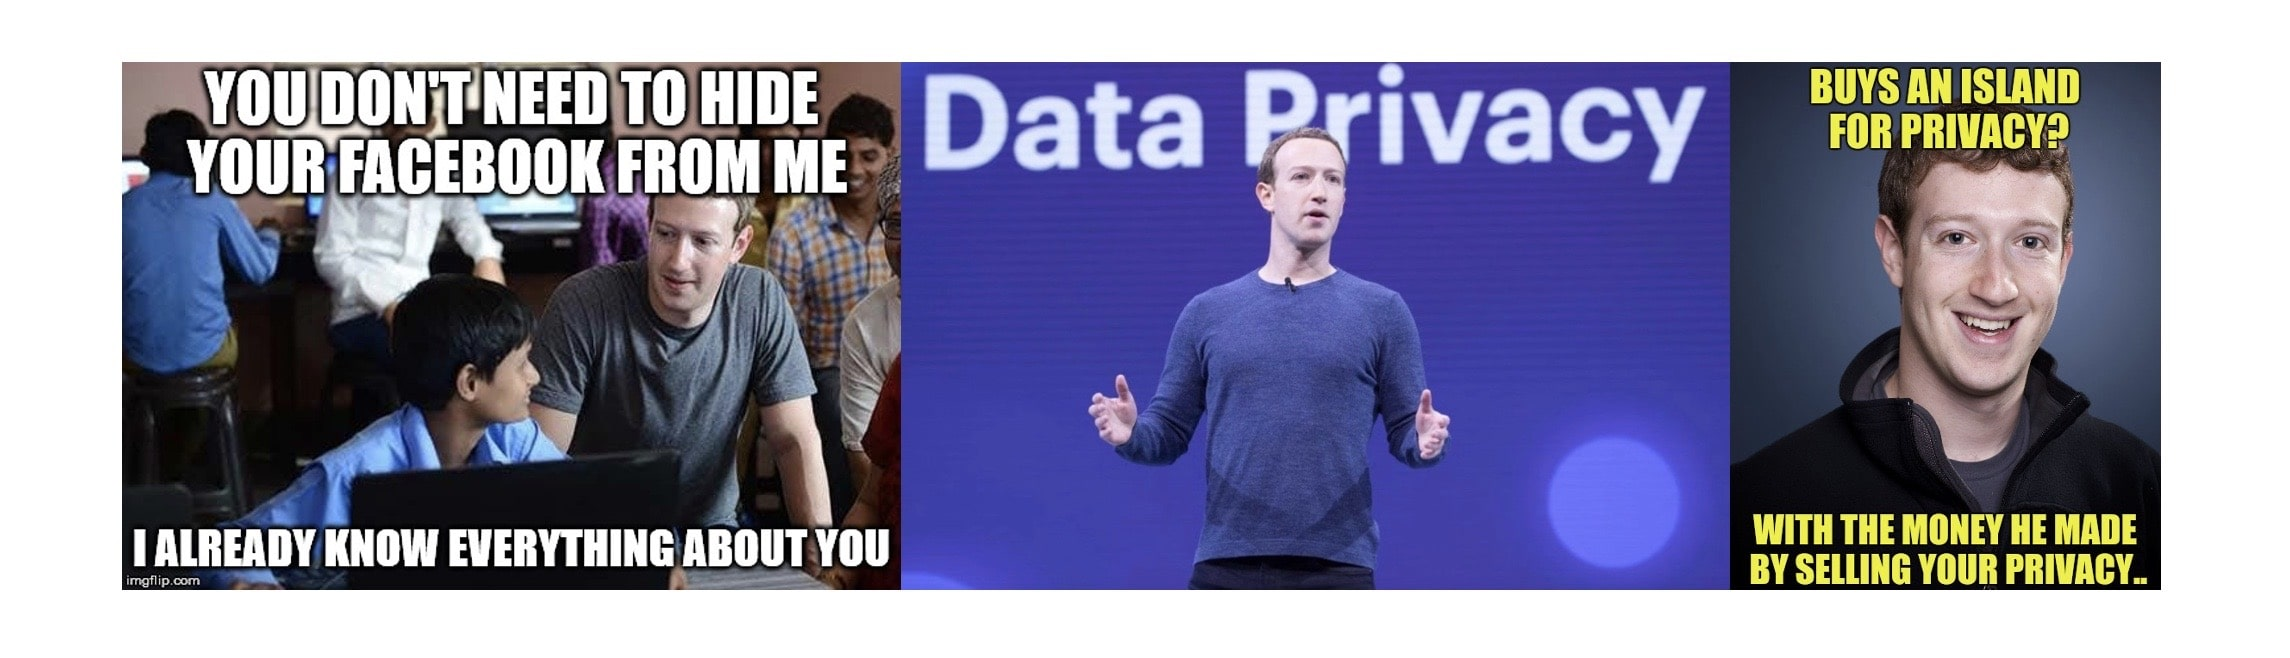

<div align="center">
    <em> 
        A combination of memes (scoured from Google image searches) for some light-hearted entertainment.
    </em>
</div>

If we *really* think about the situation, however, we would probably want to be *very* sure that there are reliable measures in place to ensure the data would not end up in the wrong hands. It is not just simply an issue of being "creeped out". Here's why:


- **Some of the information that is stored can be *particularly* sensitive.** 

> Our banks and employers, for example, have data of our Social Security numbers. If this were to end up in a malicious actor's hands, your credit could be damaged and your employment could become compromised (see [here](https://www.ssa.gov/pubs/EN-05-10064.pdf)). 

> As another example, e-commerce companies like Amazon have our credit card details stored on their data servers (if you allowed them to). If that information were to end up in a malicious actor's hands, all of our hard-earned savings could be wiped!


- **Sensitive information that we have entrusted organizations with can somehow end up (and have ended up) being available to the public.**

> It is a [well-known fact](https://knowledge.wharton.upenn.edu/article/data-shared-sold-whats-done/) that many Internet companies sell and purchase user data. It is then plausible that malicious actors could obtain sensitive user data from some of these companies with lax data governance policies (or poor data security infrastructure) $-$ read [this](https://www.vox.com/2016/5/12/11666116/70000-okcupid-users-data-release), for example. In fact, (large-scale) data breaches have occurred before (see [here](https://www.upguard.com/blog/biggest-data-breaches) for a compilation) and *will* continue to occur.

To hammer home the sheer importance of data privacy: a friend recently shared a website with me. On the website, I found out $-$ to my horror $-$ that anyone could pay a small fee to get his or her hands on sensitive information (e.g., home address, family members, phone numbers, etc.) about individuals based in the United States. Even without paying any fee, you could still get a preview of some of the sensitive information!

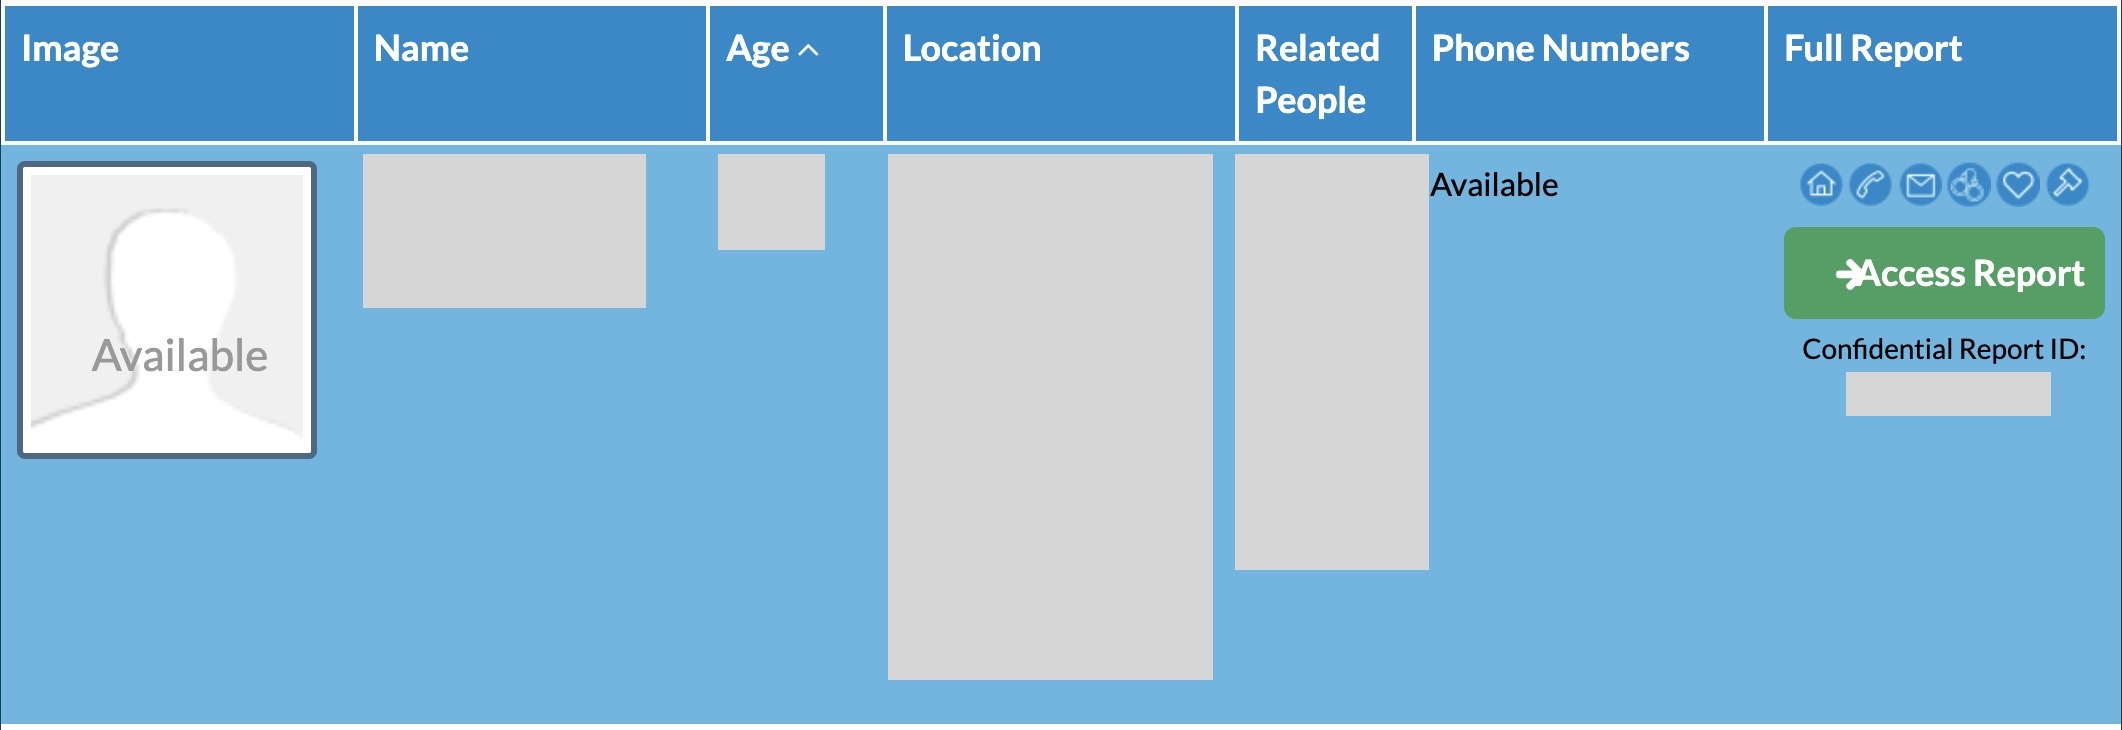

<div align="center">
    <em> 
        A screen shot of a search result on the website. The details have been obscured and the website's URL won't be posted here, for obvious reasons...
    </em>
</div>

Hopefully, I have convinced you now on why **you should care about data privacy.**

*P.S. Welcome to the era of big data.*

---

<a id='section1'></a>
## 1. What is differential privacy?

**Differential Privacy (DP)** is a formulation of data privacy that works fundamentally by adding [parametric noise](https://en.wikipedia.org/wiki/Additive_noise_mechanisms) to a dataset to conceal *individual* information, whilst still allowing useful inferences to be made about *groups* within the dataset [[1]](https://www.brookings.edu/events/the-ethical-algorithm/).
<a id='dpAnalogy'></a>
> *Analogy:* Imagine we have a few baskets of apples. Each basket has an identifying label and contains a unique number of apples. To preserve the "privacy" of these baskets via DP we add apples to some baskets and remove apples from other baskets in no particular order, but in such a way that the average number of apples per basket remains unchanged. Thus, while the original number of apples contained in, say, basket $X$ is now obscured, we still have (useful) information of the average number of apples per basket.

<a id='section1_1'></a>
### 1.1. What is *differential* about differential privacy?

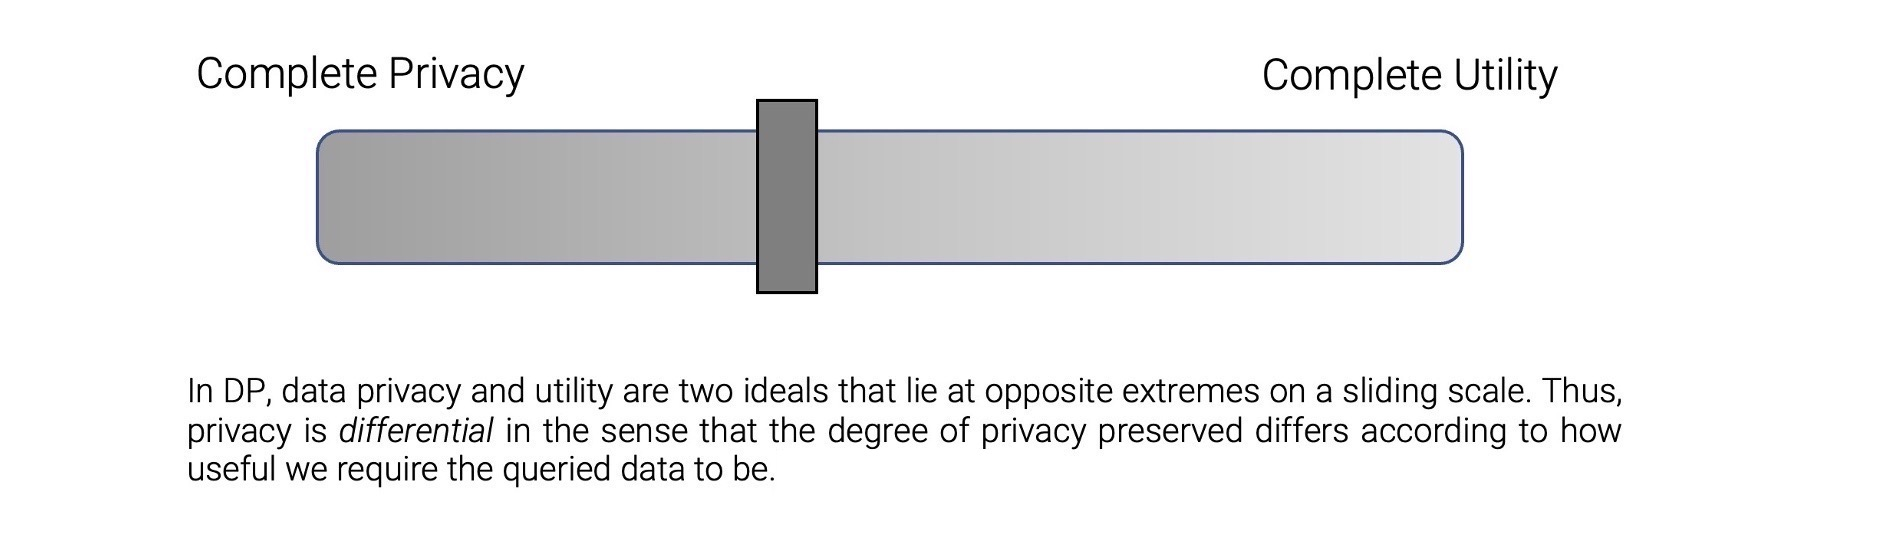

The "differential" in "differential privacy" stems from the notion that the extent to which individual information is concealed can be varied. However, this does not mean that we should maximize privacy to the fullest possible extent. There is, in fact, a trade-off\* between utility and privacy: the more we try to make a dataset private\*\* , the less useful the result of a [query](https://support.microsoft.com/en-us/office/introduction-to-queries-a9739a09-d3ff-4f36-8ac3-5760249fb65c) would be. In other words, if we wish to extract useful information from a dataset, that brings with it a risk to the privacy of the data. It is impossible to allow for useful data analysis without at least some chance of learning about the underlying data. 

TLDR: **We can't have the cake *and* eat it too!**

> \* This inevitable trade-off is more formally known as the *Fundamental Law of Information Recovery* (see page 5 of [the DP bible](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf)). It says that "for any *query mechanism* which doesn't fully destroy information, an attacker given access to enough queries could eventually reconstruct the dataset". (Note: query mechanism = query + noise-adding mechanism)

> \*\* by adding more noise (i.e., *higher-variance* noise), therefore masking individual information to a greater extent.


This may seem to doom the entire notion of differentially private data analysis. But in fact it points us towards the goal of differential privacy: to *quantify* and *limit how much* privacy is actually lost. 

> And the goal of *research* on differential privacy is, then, to postpone the inevitability of privacy loss for as long as possible.

<a id='section2'></a>
## 2. Why differential privacy?

One might then ask: why take the DP approach to preserve data privacy? Why not just anonymize the data, for example? The reason is simply that traditional approaches to preserving data privacy have proved to be flawed $-$ critically so in a few prominent cases! Let's examine these traditional approaches.

<a id='section2_1'></a>
### 2.1. "Vanilla" anonymization

The most straightforward approach is to anonymize the records in the data, i.e., remove identifying information. 

> *Example:* Names can be removed from a dataset containing medical records of patients. 

Unfortunately, this is often insufficient for protecting privacy. This is because the records can be easily de-anonymized via *linkage attacks*, which work by combining multiple datasets with overlapping information. 

For instance, suppose we have a fictional dataset containing medical records of patients:

In [18]:
## Demonstration of how a linkage attack works.

import pandas as pd

d = {'Name': ['John', 'Mary', 'Eric', 'Jane', 'Mark', 'Rachel'], 
     'Sex': ['M', 'F', 'M', 'F', 'M', 'F'], 
     'Age': [24, 26, 19, 43, 56, 82], 
     'Zip Code': [70718, 70823, 71582, 71045, 70826, 82055], 
     'AIDS Test Result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']
    }
df0 = pd.DataFrame(data=d)
df0

,Name,Sex,Age,Zip Code,AIDS Test Result
0,John,M,24,70718,Negative
1,Mary,F,26,70823,Negative
2,Eric,M,19,71582,Positive
3,Jane,F,43,71045,Negative
4,Mark,M,56,70826,Positive
5,Rachel,F,82,82055,Negative


We can anonymize the dataset by leaving out the `Name` column:

In [19]:
df0_anon = df0.copy().drop(columns=['Name'])
df0_anon

,Sex,Age,Zip Code,AIDS Test Result
0,M,24,70718,Negative
1,F,26,70823,Negative
2,M,19,71582,Positive
3,F,43,71045,Negative
4,M,56,70826,Positive
5,F,82,82055,Negative


However, this dataset can be easily de-anonymized when combined with other appropriate datasets!

Suppose we have another dataset (from, say, an address book) that looked like this:

In [20]:
d = {'Name': ['James', 'Mary', 'Dillon', 'Jessica', 'Mark', 'Zoe'],
     'Zip Code': [70822, 70823, 70824, 70825, 70826, 70827]
    }
df1 = pd.DataFrame(data=d)
df1

,Name,Zip Code
0,James,70822
1,Mary,70823
2,Dillon,70824
3,Jessica,70825
4,Mark,70826
5,Zoe,70827


Then, all we need to do to de-anonymize the dataset is to join its anonymized version with the address book dataset:

In [22]:
df_merged = df0_anon.merge(df1, 
                           how='inner', 
                           on='Zip Code'
                          )
df_merged

,Sex,Age,Zip Code,AIDS Test Result,Name
0,F,26,70823,Negative,Mary
1,M,56,70826,Positive,Mark


And that's all it took for us to know that Mark tested positive for AIDS. Clearly, this is **not** great!

In fact, *real-life* incidents of a similar (and high-profile) nature have occurred before: 

- In 1997, the health records of the then Governor of Massachusetts, William Weld, was uncovered via a linkage attack. It all began with an insurance group releasing anonymized health records where personal information like patients' names and addresses were removed. A graduate student (yes, not a professional hacker!) then managed to locate Governor Weld's health records by cross-referencing the released data with public voter rolls.

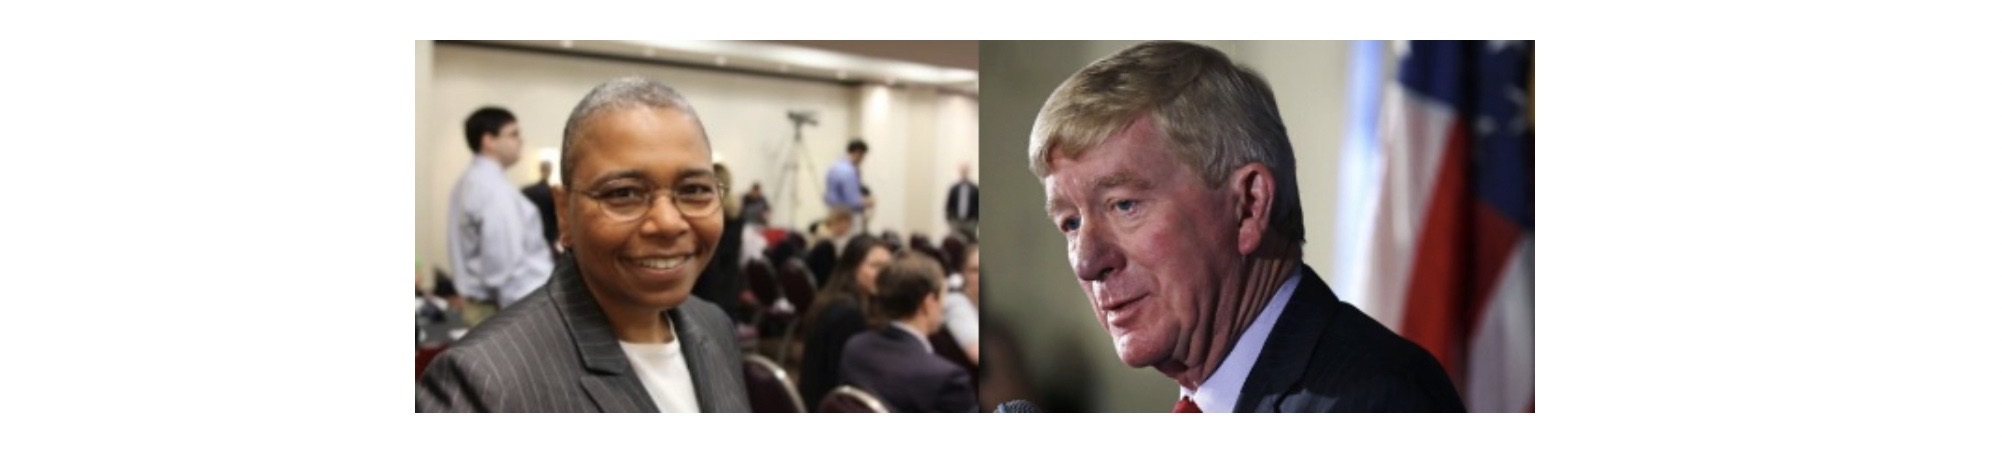

<div align="center">
    <em> 
        Latanya Sweeney (the graduate student) and William Weld. Both are actual and living human beings!
        (<a href="https://aircloak.com/history-of-data-anonymization/"> Image source
    </a>)
    </em>
</div>

- In 2006, [Netflix](https://www.netflix.com/) released an anonymized dataset\* for the [Netflix Prize Challenge](https://en.wikipedia.org/wiki/Netflix_Prize). In 2007, researchers from UT Austin managed to de-anonymize the dataset by utilizing public data from IMDb. While the algorithm they used was more sophisticated, it fundamentally utilized correlations in rating patterns between the two datasets and thus can still be considered a linkage attack.\* 

> \* See [this](https://en.wikipedia.org/wiki/Netflix_Prize#Privacy_concerns), [this](https://arxiv.org/abs/cs/0610105), and [this](https://www.cs.cornell.edu/~shmat/netflix-faq.html) for a summary of the privacy breach, the relevant paper written by the researchers, and a useful Q&A page regarding the researchers' work, respectively.

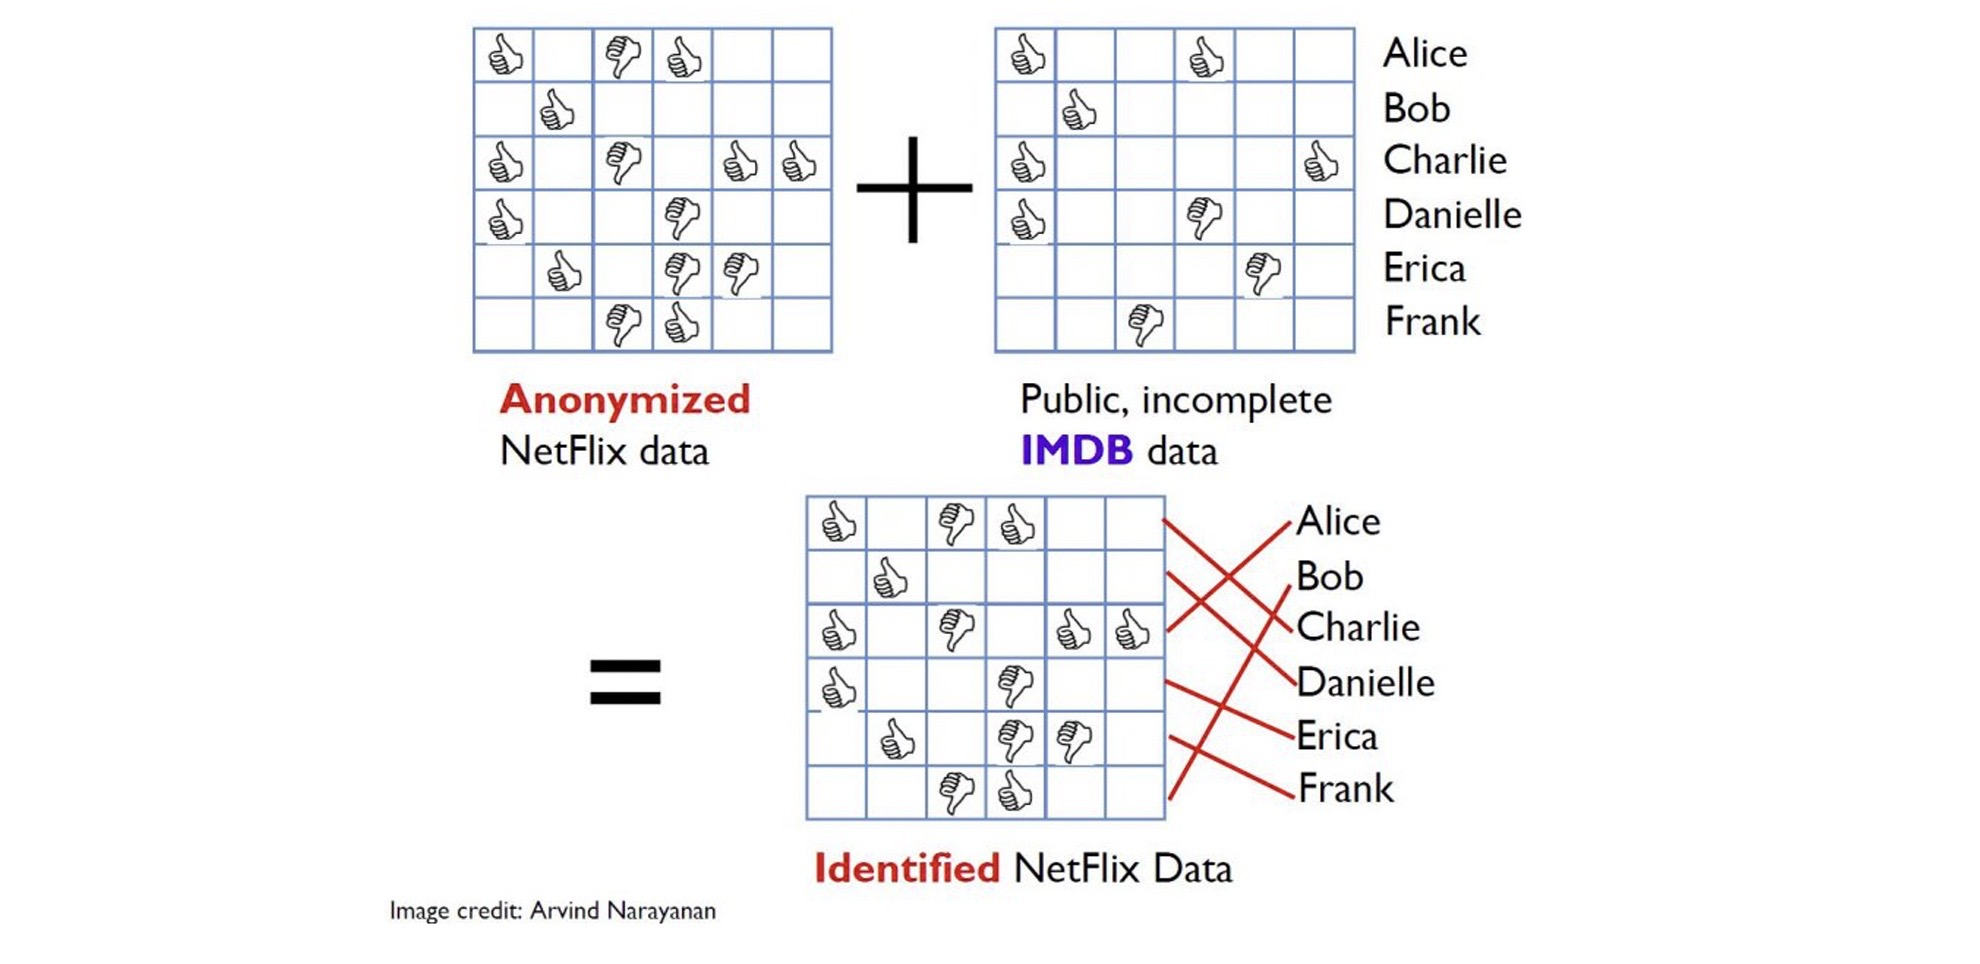

<div align="center">
    <em> 
        A handy illustration of how the Netflix dataset was de-anonymized. 
        (<a href="http://www.gautamkamath.com/CS860notes/lec1.pdf"> Image source
    </a>)
    </em>
</div>

It is due to its vulnerability to linkage attacks that "vanilla" anonymization is now deemed insufficient for privacy protection purposes.

<a id='section2_2'></a>
### 2.2. $k$-anonymization

One way to fix this vulnerability to linkage attacks is $k$-anonymization, which prevents the identification of unique records in a dataset by grouping records together at a lower ("zoomed-out") level of granularity. A $k$-anonymized dataset would be a dataset where, for any person's record, there are at least $k-1$ other records which are indistinguishable\*.

> \* To be specific, these other records should be indistinguishable with respect to *non-sensitive identifiers* (e.g., age, zip code, etc.) in the dataset. If necessary, these non-sensitive identifiers could be *censored* to aid in the anonymization process (e.g., zip code in the example below). Sensitive identifiers such as names should be removed entirely in the first place $-$ this is where "vanilla" anonymization comes in as a first step. Features that provide *directly useful* insights (e.g., medical condition in the example below) should be left as is.

Thus, if a dataset is $k$-anonymous, the best a linkage attack can do is identify a group of $k$ records which could belong to a subject of interest. Pretty neat!

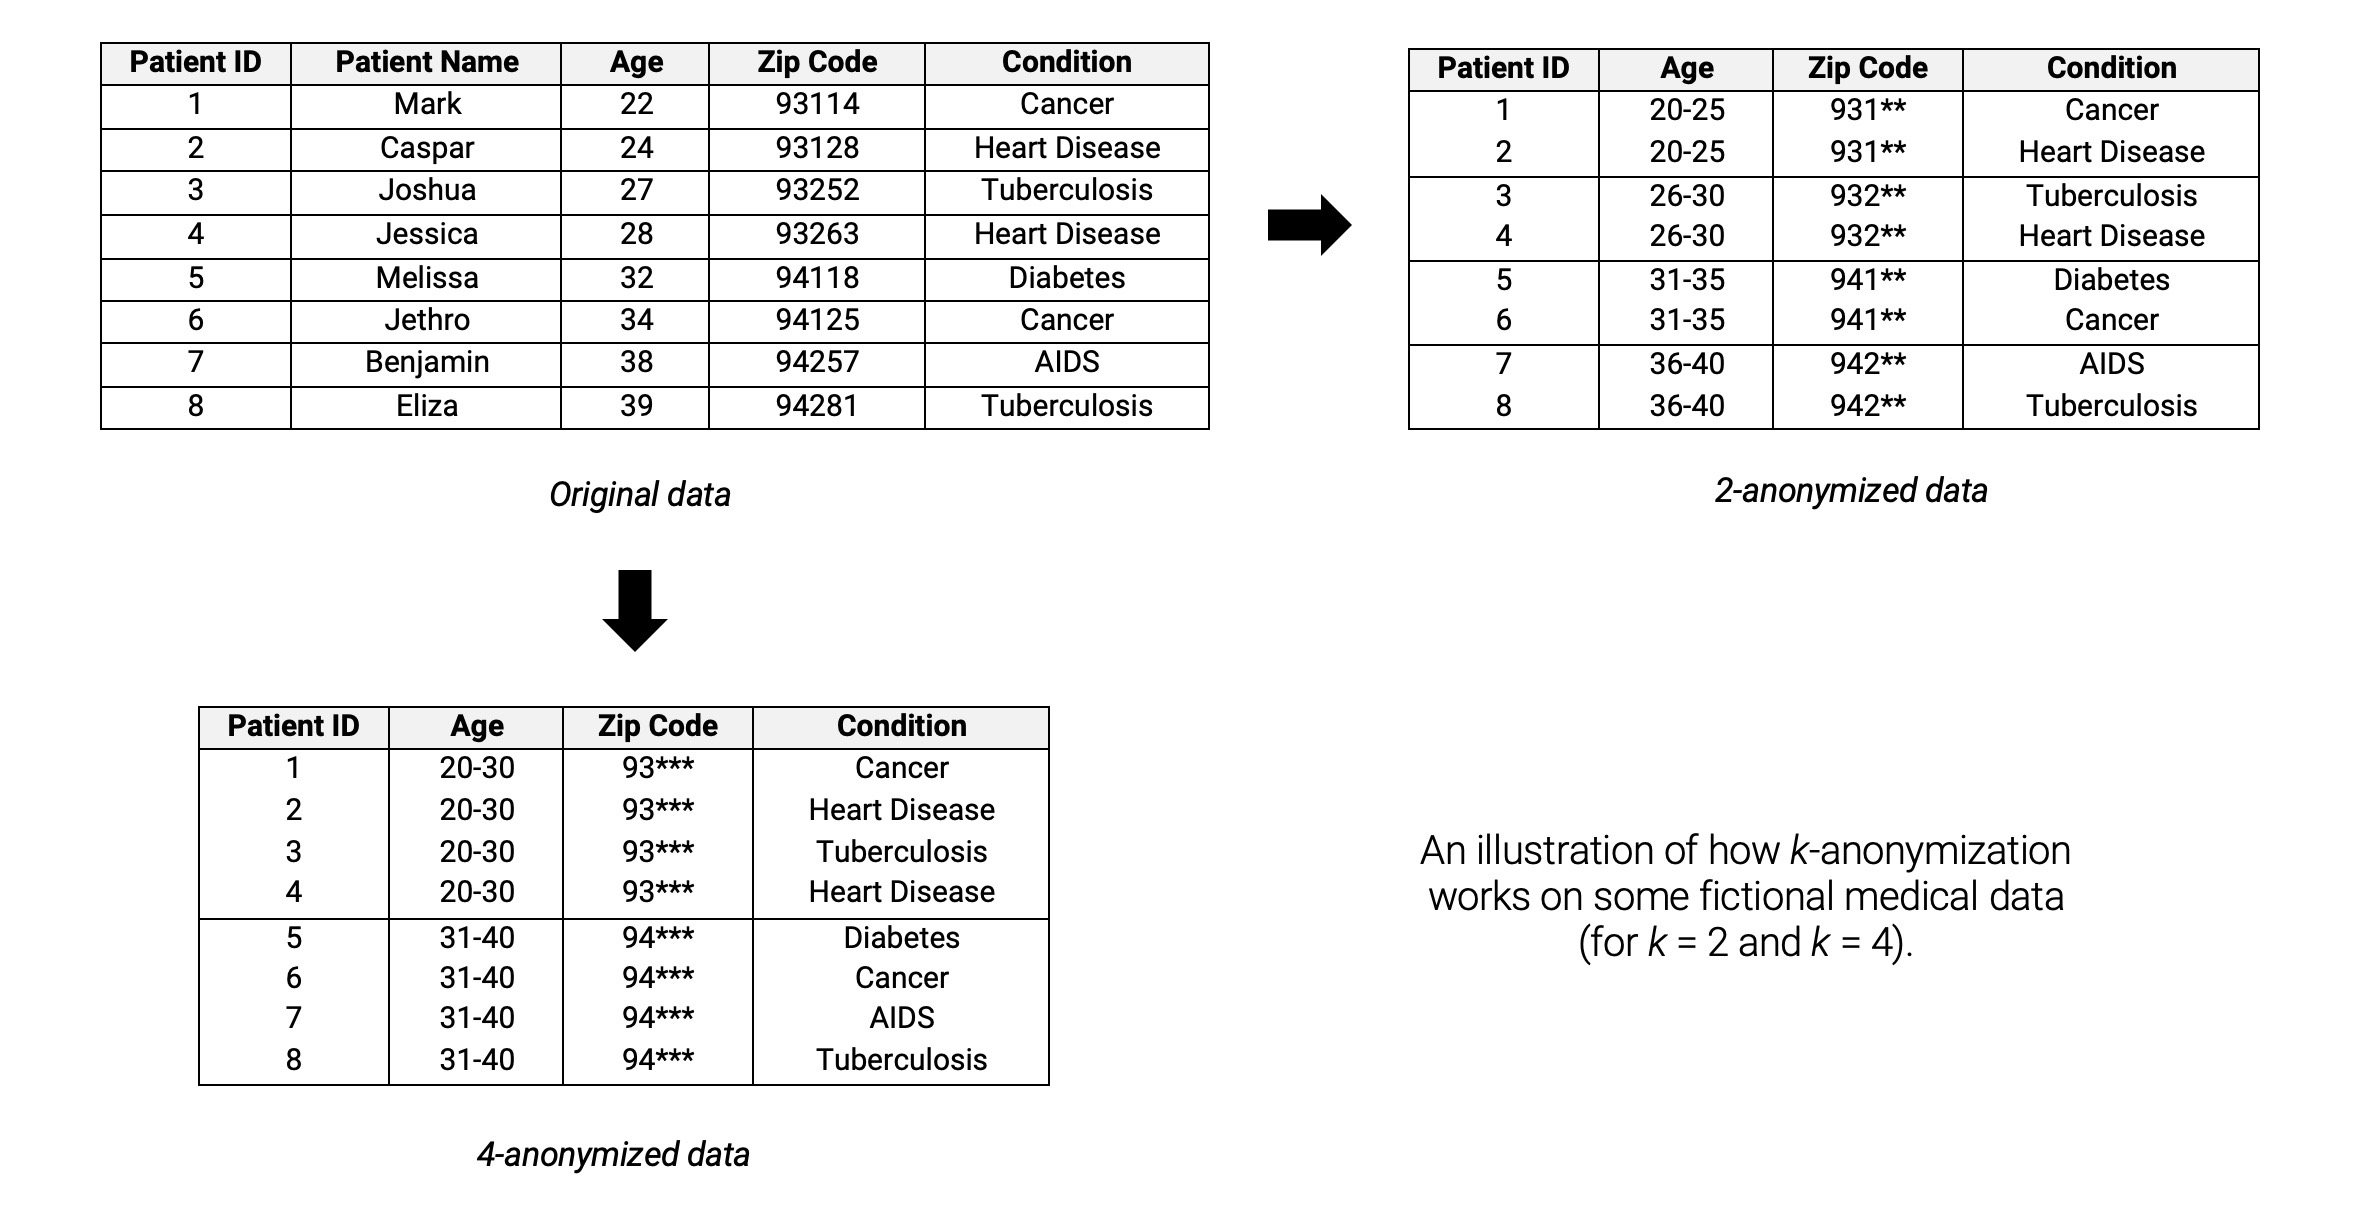

Unfortunately, $k$-anonymization only works on large datasets with small numbers of simple features. Most real-world datasets are not like that, especially in the domains where data privacy would be crucial (e.g., healthcare). They are typically high-dimensional (i.e., have many features) and each feature has many possible entries, making it very challenging to ensure that $k$ indistinguishable records exist for any subject.

<a id='section2_3'></a>
### 2.3. Rules-based queries

One way to circumvent the problems with the aforementioned anonymization techniques would be to allow only data queries that abide by certain rules. If we can't anonymize data in a foolproof way, why not set appropriate limitations on *what* data can be accessed so as to ensure privacy?


Indeed, a popular suggestion has been to allow only simple aggregation-type queries that exceed a certain set size $n$ (e.g., perform `SUM` or `COUNT` over at least $n$ records). Unfortunately, this scheme is vulnerable to [tracker attacks](https://crysp.uwaterloo.ca/courses/cs489/F07-lectures/lecture20.pdf). Tracker attacks essentially employ logic-based "hacks" that express a forbidden query as a combination of permissible queries, thereby enabling sensitive information to be extracted *indirectly*. 


For example, let's consider the "toy" medical dataset from [**Section 2.1**](#section2_1):

In [23]:
df0

,Name,Sex,Age,Zip Code,AIDS Test Result
0,John,M,24,70718,Negative
1,Mary,F,26,70823,Negative
2,Eric,M,19,71582,Positive
3,Jane,F,43,71045,Negative
4,Mark,M,56,70826,Positive
5,Rachel,F,82,82055,Negative


Suppose the querying rule is that only aggregation-type queries over at least 4 records are allowed. Then, a hacker who seeks to find out Mark's AIDS test result would not be able to do so directly. Nonetheless, the hacker can obtain the information *indirectly* by combining the results of the following two (permissible) queries:


1. Count the number of patients with a negative AIDS test result.


2. Count the number of patients with a negative AIDS test result whose name is *not* Mark.

In [24]:
## Query 1.
df0_negative = df0.loc[df0["AIDS Test Result"] == "Negative"]
print("Number of AIDS-negative patients: ", len(df0_negative))

## Query 2.
df0_negative_notMark = df0.loc[(df0["AIDS Test Result"] == "Negative") & (df0["Name"] != "Mark")]
print("Number of AIDS-negative patients whose name is not Mark: ", len(df0_negative_notMark))

Number of AIDS-negative patients:  4
Number of AIDS-negative patients whose name is not Mark:  4


As can be seen, both queries would return the same answer. From this, the hacker can then deduce that Mark has a positive AIDS test result. (Even if the patients' names were not available in the dataset, an appropriate linkage attack could have de-anonymized the dataset.)


This vulnerability to tracker attacks, and the fact that implementing increasingly complex rules would beget more sophisticated tracker attacks, is why the approach of enforcing rules on queries is $-$ *by itself* $-$ unsustainable and difficult to scale.\*\* 

> \*\* Especially when one considers that most of the people accessing the data are doing so for non-malicious, genuine purposes!

<a id='section3'></a>
## 3. How does differential privacy work?

Perhaps a fundamental shift in strategy is necessary. Neither anonymizing the data nor setting rules on queries $-$ both *deterministic* approaches $-$ seems sufficient for having privacy-preserving queries. 


What if we took a *probabilistic* approach instead, by introducing noise in a (somewhat) random way to individual records in the data? 


This would, ostensibly, help neutralize the threat of linkage and tracker attacks since individual information $-$ now obscured by noise $-$ may not always reveal the ground truth. Further, we won't know *when* they do, since the noise is added randomly! This is the core idea of how differential privacy works. (Recall the [analogy from earlier](#dpAnalogy) used to illustrate the idea.) 


Let us explore, in more detail, *what it means* for a query mechanism to be differentially private and *how* we can make it so.

<a id='section3_1'></a>
### 3.1. What is a differentially private query mechanism?

<a id='section3_1_1'></a>
#### 3.1.1. <u>Conceptual definition</u>

A differentially private query mechanism is a query mechanism that, when applied to two *neighboring datasets* that differ only by one or more individual record(s), produces outputs that are virtually *indistinguishable*.

$\hspace{1cm}$

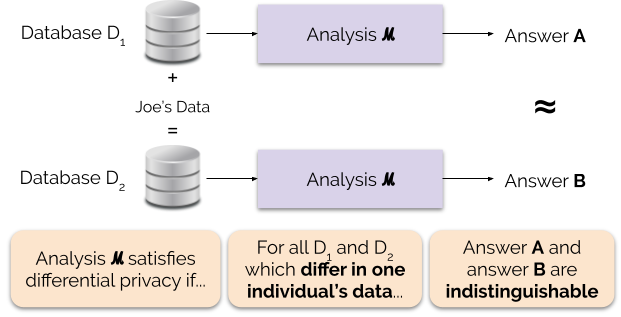


<div align="center">
    <em> 
        An illustration of what makes a query mechanism $\mathcal{M}$ differentially private.
    </em>
    <a href="https://www.nist.gov/blogs/cybersecurity-insights/differential-privacy-privacy-preserving-data-analysis-introduction-our"> (Image source)
    </a>
</div>

This makes sense: a query mechanism\* that is **not** differentially private would allow us to "reverse-engineer" the individual record from the difference in the now distinguishable outputs, which would compromise privacy!

> \* A query mechanism encompasses both the querying and the *noising* mechanism. (More on how noising works later.)

<div class="alert alert-block alert-info">
<span style="color:black">This feels like an artifical set-up with no basis in reality...?</span>
</div>

It *does have* a basis in reality. To get a practical perspective we can consider the realistic scenario where one or more individuals need to decide whether to allow their data to be saved in a database. These individuals could be patients at a hospital. They could even include you when you are deciding whether to complete a survey, or giving permission to a website to save your information!

<a id='section3_1_2'></a>
#### 3.1.2. <u>Formal definition</u>

Consider two databases $D$ and $D'$ that differ by only a *single* record. Also, consider a query mechanism $\mathcal{M}$ that operates on each of the databases to produce a result. Then, $\mathcal{M}$ is $\epsilon$-**differentially private** iff the results $\mathcal{M}(D)$ and $\mathcal{M}(D')$ are practically indistinguishable up to some multiplicative constant $\exp(\epsilon)$ for every choice of $D$ and $D'$, as well as for any subset $S$ of $\text{Range}(\mathcal{M})$. In mathematical terms:

<br>
    
$$
\frac{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) \in S]}{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S]} \leq \exp(\epsilon) \hspace{3mm},\hspace{2mm} \text{where} \hspace{2mm} \epsilon \in [0, \infty)
$$

<br>

By noting that $D$ and $D'$ are interchangeable\* in the inequality, we can derive a tighter inequality that includes a lower bound:

<br>

$$
\exp(-\epsilon) \leq \frac{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) \in S]}{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S]} \leq \exp(\epsilon)
$$

<br>

> \* Saying that $D$ and $D'$ differ by one record is equivalent to saying that $D'$ and $D$ differ by one record.


<div class="alert alert-block alert-info">
<span style="color:black">Where had the first inequality come from?</span>
</div>

In the inequality, why do we take the $\exp$ of $\epsilon$ instead of using $\epsilon$ directly? Further, why take the ratio of $\mathcal{M}(D)$ to $\mathcal{M}(D')$ instead of their difference?


It all has to do with the noise-adding stage of the query mechanism $\mathcal{M}$. During that stage, noise *drawn from some probability distribution* is added to the data queried from the databases $D$ and $D'$. Thus there would be a probability distribution *over* each of the query outputs $\mathcal{M}(D)$ and $\mathcal{M}(D')$ (which we may treat now as random variables). Then, we would just need to quantify the difference in *information content* between $\mathcal{M}(D)$ and $\mathcal{M}(D')$, and upper-bound it by an appropriate, non-negative constant $\epsilon$. 


From Information Theory, we know that the *entropy* of a query output would tell us the amount of *missing information* (i.e., "surprise", or "uncertainty") inherent to the output's possible values (see [here](https://github.com/Physsionist/Entropy-Primer/blob/main/Entropy%20Slides.pdf)). Thus, the *relative entropy* of the query outputs $\mathcal{M}(D)$ and $\mathcal{M}(D')$ would essentially give us the difference in their information content. The <em>Rényi divergence</em>\* (over real space and of order $\alpha = \infty$) helps make this explicit:

<br>

$$\mathrm{div}_{\infty}[\mathcal{M}(D) || \mathcal{M}(D')] = \sup_{x \in \text{supp} \mathcal{M}} \ln \frac{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) = x]}{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x]}$$

<br>

> \* This is simply a generalization of the more well-known Kullback-Leibler divergence. (See [here](https://arxiv.org/abs/1702.07476).)

The $\displaystyle\sup_{x \in \text{supp} \mathcal{M}}$ in the equation basically means "maximum value of, where $x$ can be any value in the *support set* of $\mathcal{M}$ (i.e., insofar as $\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x] \neq 0\hspace{1mm}$)." 

> $\sup$ is just a shorthand notation for "supremum", the meaning of which is explained concisely [here](https://math.stackexchange.com/a/160457).

Now, to ensure that the relative entropy of $\mathcal{M}(D)$ and $\mathcal{M}(D')$ does not exceed $\epsilon$ we simply upper-bound the Rényi divergence with $\epsilon$ as follows:

<br>

$$\sup_{x \in \text{supp} \mathcal{M}} \ln \frac{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) = x]}{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x]} \leq \epsilon$$

<br>

This is where the meaning of $\sup$ comes in handy. If the maximum of a quantity $Y$ does not exceed $\epsilon$, then the quantity $Y$ *itself* cannot exceed $\epsilon$ too! Thus, we may rewrite the inequality as such:

$$\ln \frac{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) = x]}{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x]} \leq \epsilon \hspace{2mm}, \hspace{2mm}\text{for any} \hspace{1mm} x \in \text{supp} \mathcal{M}$$

Taking the exponent of both sides, we get:

$$\frac{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) = x]}{\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x]} \leq \exp (\epsilon ) \hspace{2mm}, \hspace{2mm}\text{for any} \hspace{1mm} x \in \text{supp} \mathcal{M}$$

<br>

This looks almost like the original inequality we are trying to derive, but not quite. The following steps would do the trick:

<br>

$$
\begin{align*}
\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) \in S] &= \sum_{x \in S} \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) = x] \hspace{3cm} (\hspace{1mm} \text{by definition}\hspace{1mm}) \\[8pt]
&\leq \sum_{x \in S} \exp (\epsilon ) \hspace{2mm} \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x] \hspace{1.5cm} (\hspace{1mm} \text{by the inequality above}\hspace{1mm}) \\[8pt]
&= \exp (\epsilon )\sum_{x \in S} \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') = x] \hspace{1.65cm} (\hspace{1mm} \text{pull out the constant coefficient} \hspace{1mm}) \\[8pt]
&= \exp (\epsilon ) \hspace{2mm} \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S] \hspace{2.1cm} (\hspace{1mm} \text{by definition} \hspace{1mm})
\end{align*}
$$

<br>


Dividing both sides by $\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S]$ would then give us the inequality we saw in the formal definition of a differentially private query mechanism. Voilà!

<a id='section3_1_3'></a>
#### 3.1.3. <u>The role of $\epsilon$</u>

The numerical factor $\epsilon$ controls the *degree* of privacy that is afforded to the database $D$. 

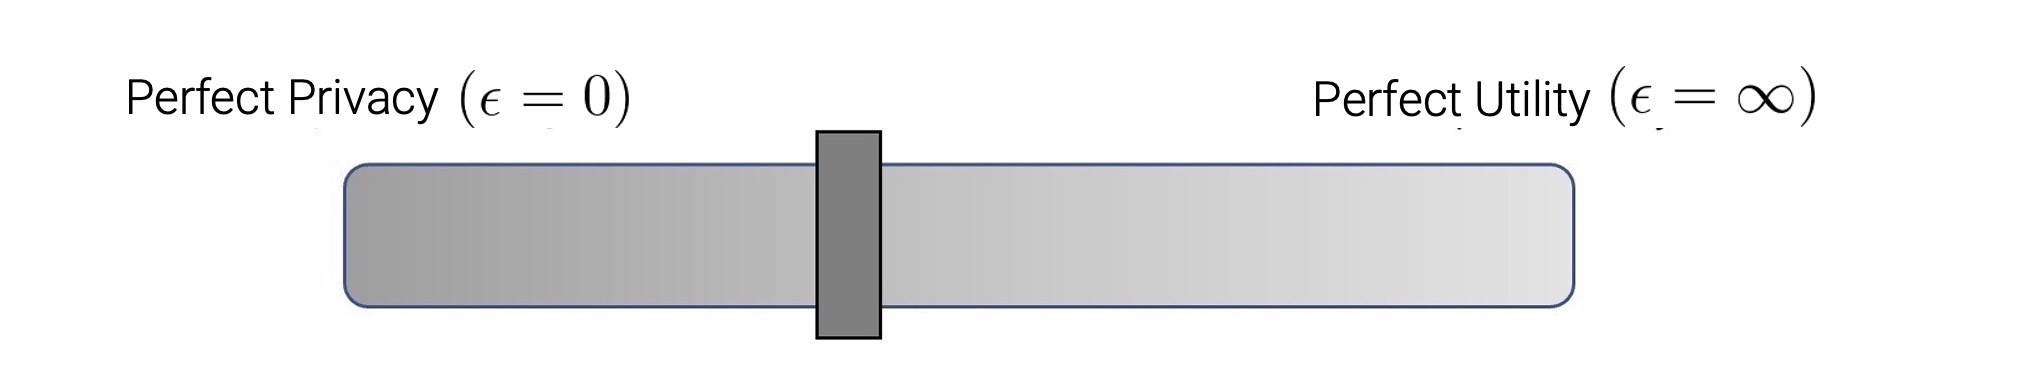

**On the lower extreme when** $\mathbf{\epsilon = 0}$, the inequality above yields $\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) \in S] = \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S]$. So applying $\mathcal{M}$ to $D$ and $D'$ produces *virtually indistinguishable* query results, which means that $\mathcal{M}$ provides **PERFECT privacy but ZERO accuracy ($\hspace{1mm}\therefore\hspace{1mm}$ ZERO utility).**


**On the other extreme when** $\mathbf{\epsilon \rightarrow \infty}$, the ratio $\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) \in S] \hspace{1mm}/\hspace{1mm} \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S]$ becomes unbounded. Now, applying $\mathcal{M}$ to $D$ and $D'$ can certainly produce *distinguishable* query results. This means that $\mathcal{M}$ provides **PERFECT accuracy/utility but ZERO privacy.**


Clearly, neither of these extremes are ideal. The "sweet spot" value for $\epsilon$ typically lies between 0.1 and 5, and varies depending on contextual needs\*.

> \* These numbers were obtained from lecture materials prepared by a veteran data scientist.

Principled methods of choosing $\epsilon$'s value that balance between the *analyst's* interest (in accuracy/utility) and the *user's* interest (in privacy) seem to exist (see [here](https://arxiv.org/abs/1402.3329), for example), though the author is not aware of any widespread consensus on what method(s) should be considered mainstream.

<a id='section3_2'></a>
### 3.2. How do we make a query mechanism differentially private?

Now that we know the definition of a differentially private query mechanism, *how* do we make a query mechanism fulfil that definition?


The idea is that the noise component of a query mechanism $\mathcal{M}$ is parameterized by $\epsilon$. In this way, $\epsilon$ is like a knob that we turn to modify $\mathcal{M}$ so that $\mathcal{M}$ is $\epsilon$-differentially private. In quantitative terms, suppose we are querying a vector of sensitive data $\mathbf{X} = \{X_1, X_2, ..., X_n\}$ via some function $f : \mathbb{R}^n \rightarrow \mathbb{R}^k$ (e.g., grouped mean of the data). The query mechanism may then be expressed as 

<br>

$$\mathcal{M}(\mathbf{X}) = f(\mathbf{X}) + \mathbf{W}$$

<br>

where $\mathbf{W} = (\hspace{0.5mm}W_1, W_2, ..., W_k\hspace{0.5mm})$ is a noise vector and each $W_i \sim \text{PN}\hspace{0.5mm}(\hspace{0.5mm}\epsilon \hspace{0.5mm})$ is drawn from some distribution of our choice.

# To Be Continued (TBC) 

Everything henceforth is just a scattered thought or note that hasn't yet been organized.

<a id='section3_2_1'></a>
#### 3.2.1. The Laplace Mechanism

The Laplace Mechanism is just a query mechanism wherein the noise component is drawn from the [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution).


It "masks" the sensitive data $\mathbf{X}$ by adding noise drawn from a Laplace distribution to the output of the query function $f$. This Laplace noise variable would have a location parameter of $\mu = 0$ (i.e., centered at $0$) and a scaling parameter $b = \Delta /\epsilon$ that is *appropriate to the sensitivity of* \*\* $f$. Thus, the masked (function of the) data may be expressed as 

<br>

$$M(\mathbf{X}) = f(\mathbf{X}) + \mathbf{W}$$

<br>

where $\mathbf{W} = (\hspace{0.5mm}W_1, W_2, ..., W_k\hspace{0.5mm})$ and each $W_i \sim \text{Laplace}\hspace{0.5mm}(\hspace{0.5mm}0, \Delta /\epsilon \hspace{0.5mm})$.


It is more widely used in comparison with other probability distributions such as Gaussian distribution, because its parameters have a more straightforward (i.e., "clean") form with regards to guaranteeing $\epsilon$-differential privacy (see [here](https://www.quora.com/Why-is-the-Laplace-distribution-used-in-differential-privacy)). Nonetheless, there are circumstances where a Guassian distribution could be preferable; see [this](https://www.quora.com/Why-is-the-Laplace-distribution-used-in-differential-privacy), for example.


What if we introduced [parametric noise](https://en.wikipedia.org/wiki/Additive_noise_mechanisms)\* to the *queried* data\*\*, such that aggregated information (e.g., mode of, or most common, disease status) remains accurate while individually-identifying information (e.g., disease status of person $X$) becomes difficult to uncover? (Recall the [analogy from earlier](#dpAnalogy) used to illustrate this idea.)

> \* This just means *statistically-controlled* (not deterministic!) noise, or noise drawn from a probability distribution characterized by pre-determined parameters (e.g., Gaussian distribution with mean $\mu_0$ and variance $\sigma_0^2$).

> \*\* so the original data in the database itself remains unmodified; we don't want to corrupt the data source!

The scale $c/\epsilon$ of the Laplace distribution controls its spread: the distribution is wider for more sensitive functions (larger $c$) or stronger privacy guarantees (smaller $\epsilon$), giving a higher probability of adding more noise. For example, suppose that we have a database $D$ of medical information and we wish to compute the proportion of smokers in a differentially private way. If the database has $N$ records, define $g(D) = (\text{Number of smokers in } D)/N$. Notice that, on any two neighboring databases, this proportion changes by at most $1/N$, since the numerator changes by at most $1$ if a single record is altered. Thus, $L(D) = g(D)+ν$, where $ν ∼ \text{Laplace}(1/Nε)$ is an $\epsilon$-differentially private mechanism.

<a id='section3_2_2'></a>
#### 3.2.2. The Randomized Response Mechanism

An early example of privacy by randomized process is randomized response, a technique developed in the social sciences to collect statistical information about embarassing or illegal behavior, captured by having a property $P$. Study participants are told to report whether or not they have property $P$ as follows: 

1. Flip a coin. 

2. If tails, then respond truthfully. 

3. If heads, then flip a second coin and respond “Yes” if heads and “No” if tails.


We can show that the this mechanism is differentially private, and can be replicated by the noise-adding approach.

<u>Exploring the effects of parameters in the Randomized Response Mechanism:</u>

> Write a simulation with the following parameters:
>
>
> $$p = 0.1, 0.2$$
>
> $$n = 50, 100, 1000$$
>
> $$\gamma = 0.1, 0.25, 0.4$$
>
>
> - Using these parameters, simulate distributions for $\hat{p}$.
>
> - Produce histograms of all your simulated distributions.
>
> - Comment on the accuracy of the estimator $\hat{p}$ with respect to $p$, $n$ and $\gamma$.

***

<div class="alert alert-block alert-info">
<span style="color:black"><b>0.</b> Import necessary libraries.</span>
</div>

In [35]:
import scipy.stats as stats
import numpy as np
import itertools
import matplotlib.pyplot as plt

from matplotlib import rc
rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div class="alert alert-block alert-info">
<span style="color:black"><b>1.</b> Obtain all possible conditions, i.e., combinations of $p$, $n$, and $\gamma$.</span>
</div>

> **Note:** *$p$ denotes a possible value of the probability parameter in the distribution underlying the (sensitive) data $\{X_1, X_2, X_3, ...\}$ we seek to "mask" via differential privacy. It is different than and independent of the probability that $Y_i = X_i\hspace{1mm}$!*

In [36]:
p = [0.1, 0.2]
n = [50, 100, 1000]
gamma = [0.1, 0.25, 0.4]
unmixed_variables = [p, n, gamma]
conditions = list(itertools.product(*unmixed_variables))

In [37]:
conditions

[(0.1, 50, 0.1),
 (0.1, 50, 0.25),
 (0.1, 50, 0.4),
 (0.1, 100, 0.1),
 (0.1, 100, 0.25),
 (0.1, 100, 0.4),
 (0.1, 1000, 0.1),
 (0.1, 1000, 0.25),
 (0.1, 1000, 0.4),
 (0.2, 50, 0.1),
 (0.2, 50, 0.25),
 (0.2, 50, 0.4),
 (0.2, 100, 0.1),
 (0.2, 100, 0.25),
 (0.2, 100, 0.4),
 (0.2, 1000, 0.1),
 (0.2, 1000, 0.25),
 (0.2, 1000, 0.4)]

<div class="alert alert-block alert-info">
<span style="color:black"><b>2.</b> Generate the data.</span>
</div>

In [38]:
def randomized_response(p, n, gamma):
    
    # Draw n samples of X with probability p from the Bernoulli distribution
    X_samples = np.random.binomial(1, p, size=n)
    
    # Generate flip decisions for the n samples with flip probability (0.5 + gamma)
    flip_array = 1*(np.random.uniform(size=n) > 0.5 + gamma)
    
    # Get the n samples of Y associated with X
    Y_samples = (1 - X_samples)*flip_array + X_samples*(1 - flip_array)
    
    # Generate estimates of p from Y_samples
    p_hat = 1/n * np.sum(1/(2*gamma) * (Y_samples - 0.5 + gamma))
    
    return p_hat

In [39]:
outcomes = []

for tup in conditions:
    p_hat_list = [randomized_response(tup[0], tup[1], tup[2]) for i in range(100000)]
    outcomes.append(p_hat_list)

<div class="alert alert-block alert-info">
<span style="color:black"><b>3.</b> Plot the data.</span>
</div>

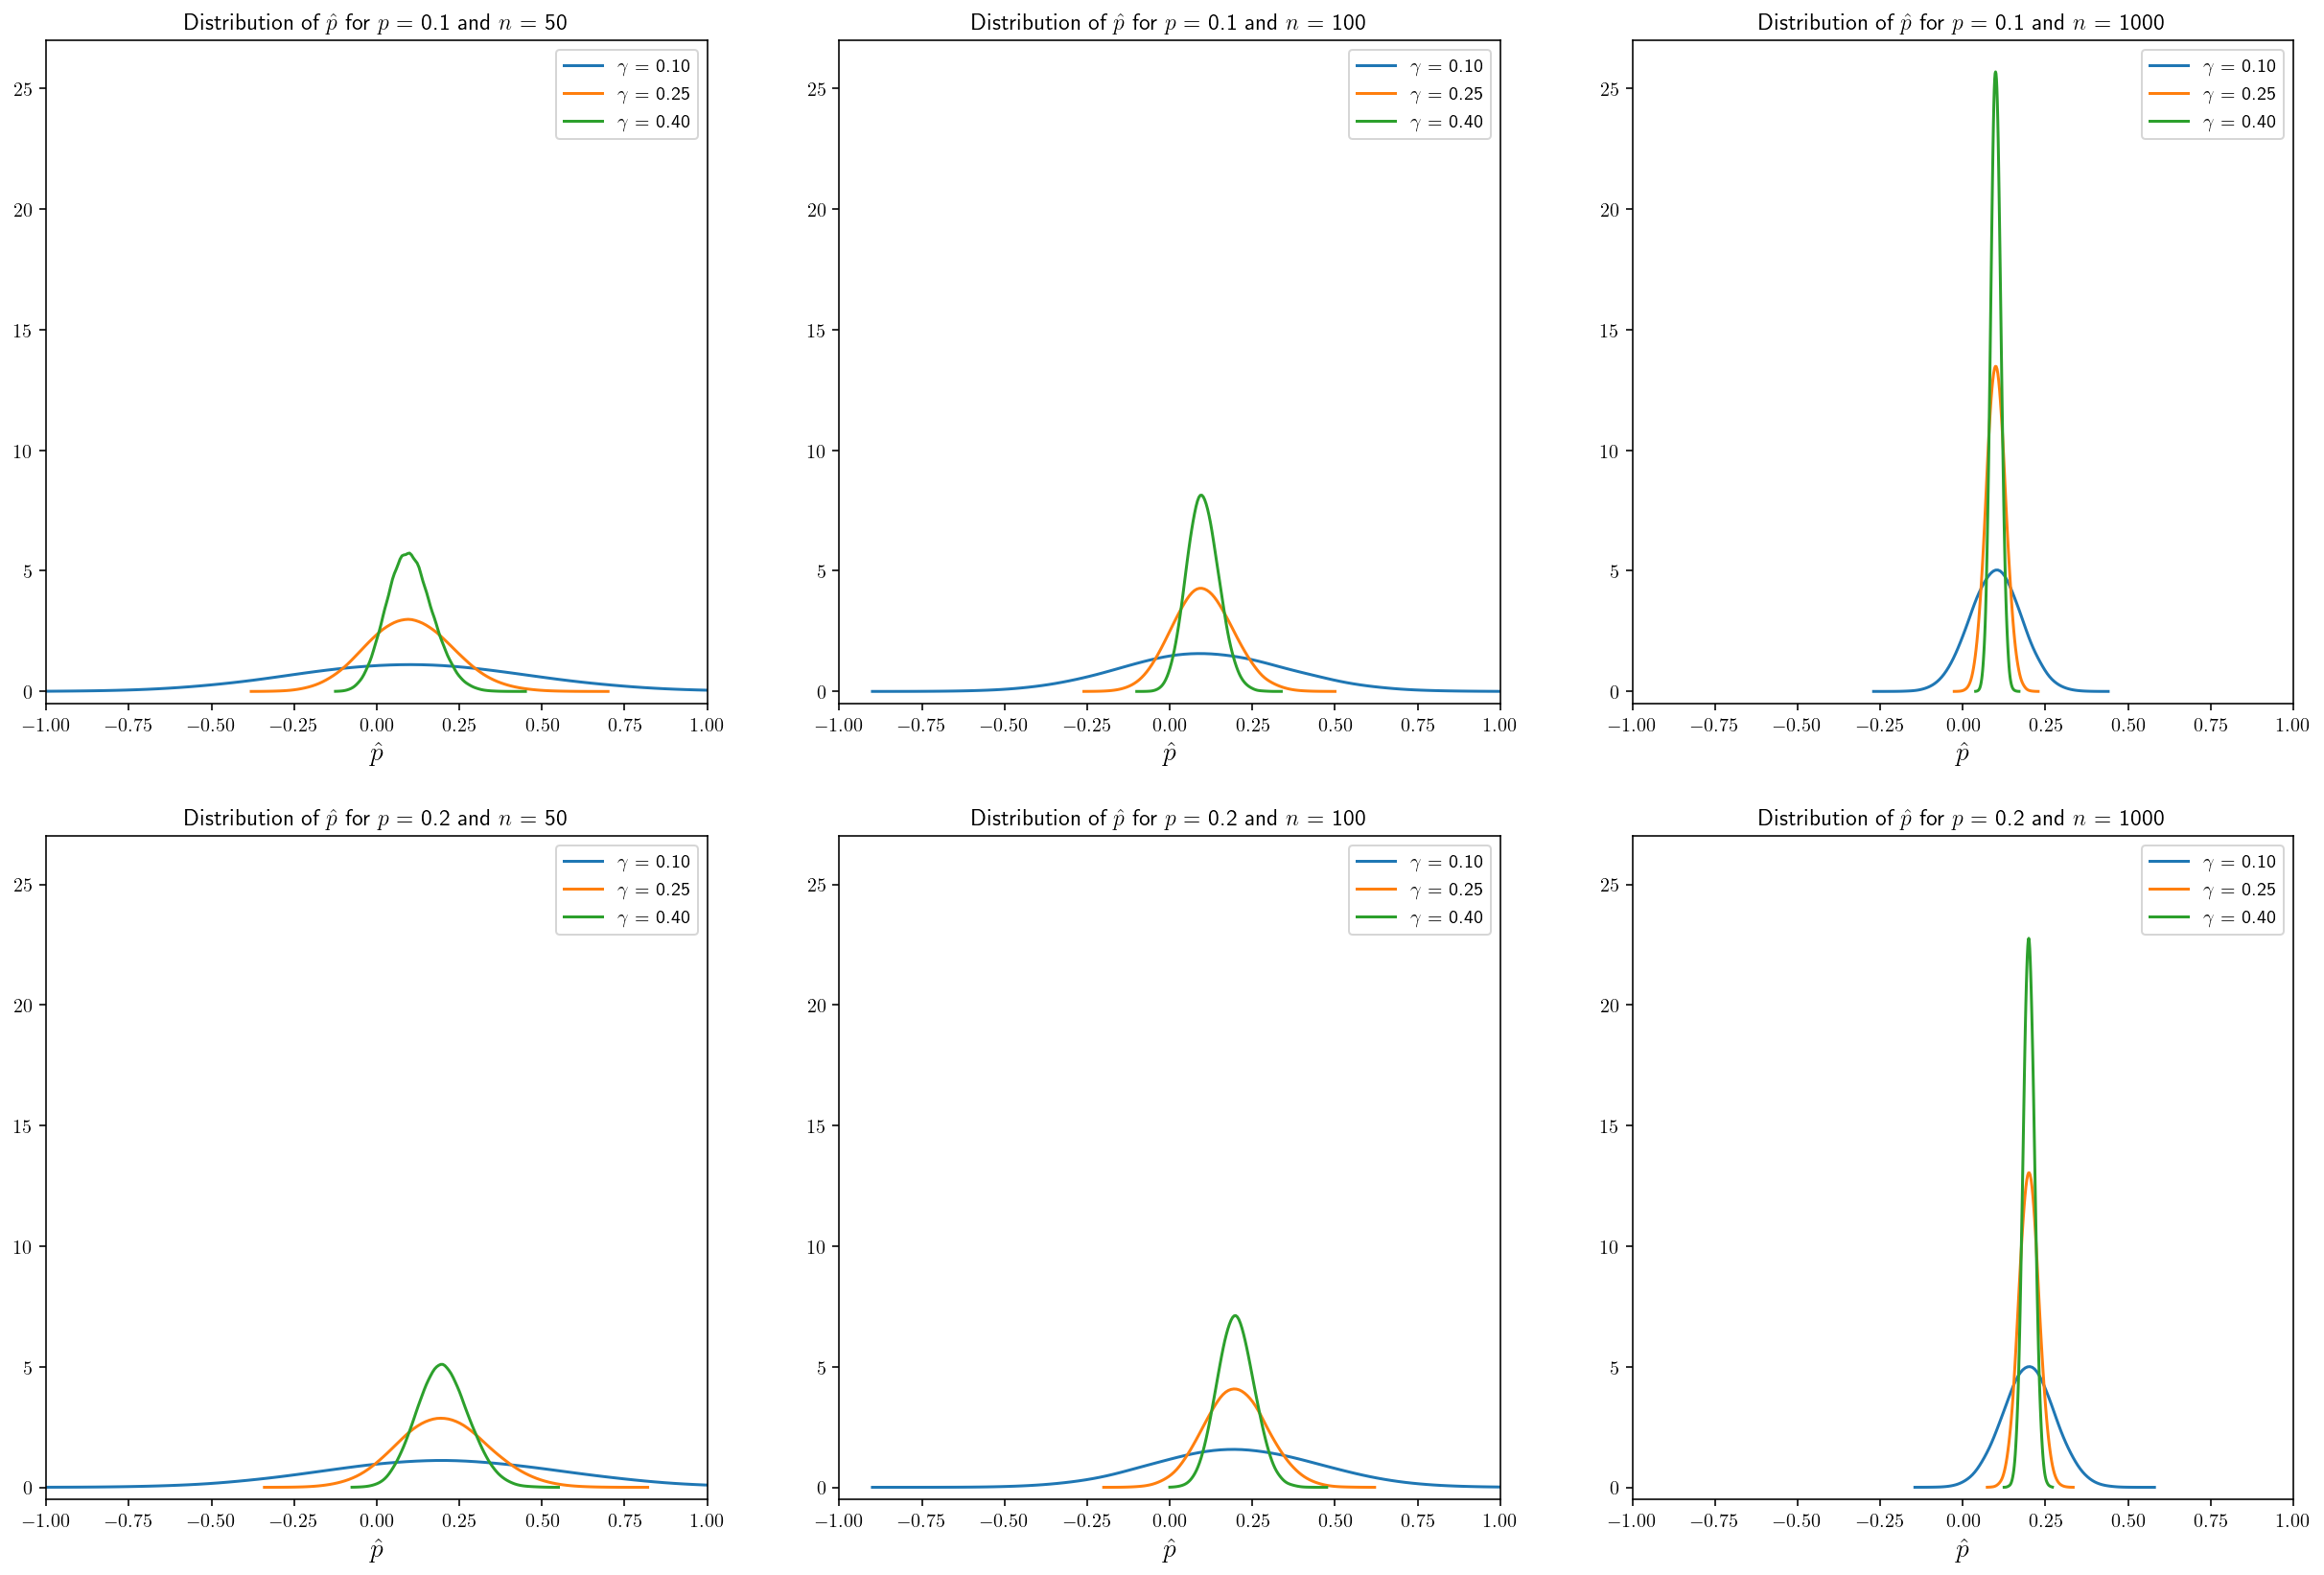

In [40]:
fig = plt.figure(figsize=(21, 14))
columns = 3
rows = 2

for i in range(0, len(conditions), 3):
    
    data_gamma_010 = outcomes[i] # Histogram data for gamma = 0.10
    data_gamma_025 = outcomes[i+1] # Histogram data for gamma = 0.25
    data_gamma_040 = outcomes[i+2] # Histogram data for gamma = 0.40
    fig.add_subplot(rows, columns, 1+(i+1)//3) # Add subplots
    plt.xlim([-1, 1])
    plt.ylim([-0.5, 27])
    
    # Plot smoothed line (approximate distribution) in place of histogram bars, using a kernel density estimator.
    kernel = stats.gaussian_kde(data_gamma_010)
    kernel.set_bandwidth(bw_method=0.2)
    _, x  = np.histogram(data_gamma_010, bins=100, density=True)
    plt.plot(x, kernel(x), label="$\gamma$ = 0.10")
    
    # Plot smoothed line (approximate distribution) in place of histogram bars, using a kernel density estimator.
    kernel = stats.gaussian_kde(data_gamma_025)
    kernel.set_bandwidth(bw_method=0.2)
    _, x  = np.histogram(data_gamma_025, bins=100, density=True)
    plt.plot(x, kernel(x), label="$\gamma$ = 0.25")

    # Plot smoothed line (approximate distribution) in place of histogram bars, using a kernel density estimator.
    kernel = stats.gaussian_kde(data_gamma_040)
    kernel.set_bandwidth(bw_method=0.2)
    _, x  = np.histogram(data_gamma_040, bins=100, density=True)
    plt.plot(x, kernel(x), label="$\gamma$ = 0.40")
    
    # Plot legend, title, and label for x-axis.
    p = conditions[i][0]
    n = conditions[i][1]
    plt.title('Distribution of $\hat{p}$ for $p$ = %s and $n$ = %s' % (p, n))
    plt.legend()
    plt.xlabel("$\hat{p}$", size=14)

We can make two inferences here: 


- The *precision* of the estimator $\hat{p}$ increases as the sample size $n$ increases. 
> An alternative restatement: The *variance* of the estimator $\hat{p}$ *decreases* as the sample size $n$ increases.


- The *accuracy* of the estimator $\hat{p}$ with respect to $p$ increases as $\gamma$ increases.
> An alternative restatement: The *bias* of the estimator $\hat{p}$ *decreases* as $\gamma$ increases.

<a id='section3_2_3'></a>
#### 3.2.3. Matching the outputs of  the two mechanisms

***
> In a randomized response setting, fix the following parameters:
>
>
> $$p = 0.1$$
>
> $$n = 100$$
>
> $$\gamma = 0.25$$
>
>
> - Using these parameters, what value of $\epsilon$ in the Laplace mechanism would yield a distribution of $\hat{p}$ that matches the distribution of $\hat{p}$ yielded by the randomized response mechanism?
>
>
> - Regardless of how you find this value of $\epsilon$, produce histogram plots for the distribution of $\hat{p}$ simulated via both mechanisms.

***

<div class="alert alert-block alert-info">
<span style="color:black"><b>0.</b> Find the desired value of $\epsilon$ analytically.</span>
</div>

The randomized response mechanism "masks" the sensitive data $\{X_1, X_2, ..., X_n\}$, which we can simulate by treating the $X_i$'s as independent realizations of a binomial random variable $X$ with parameters $n$ (number of trials) and $p$ (probability of 'success'), by utilizing a binomial random variable $Y$ as follows:

<br>

$$
\begin{equation}
  Y =
    \begin{cases}
      X & \text{with probability $0.5+\gamma$}\\
      1 - X & \text{with probability $0.5-\gamma$}
    \end{cases}       
\end{equation}
$$

<br>

For the mechanism to work at least in theory, we must be able to construct a good estimator of $p$. It turns out that an *unbiased* estimator exists:

<br>

$$ \hat{p} = \frac{1}{n} \displaystyle\sum_{i=1}^n \left[ \frac{Y_i - 0.5 + \gamma}{2\gamma} \right] $$

<br>

It can be shown, using the expression above, that 

$$\mathbb{E}\hspace{0.5mm}(\hat{p}) = \frac{1}{n} \displaystyle\sum_{i=1}^n X_i \approx p \hspace{5mm} (\text{for a sufficiently large value of} \hspace{1mm} n)$$

and

$$\text{Var}\hspace{0.5mm}(\hat{p}) = \frac{1}{4\gamma^2 n^2} \displaystyle\sum_{i=1}^n \text{Var}\hspace{0.5mm}(Y_i)$$

<br>

The variance of $Y_i$ can be obtained as follows:

<br>

$$
\begin{align}
\text{Var}\hspace{0.5mm}(Y_i) &= \color{DarkBlue}{\mathbb{E}\hspace{0.5mm}(Y_i^2)} - \color{Maroon}{[\mathbb{E}\hspace{0.5mm}(Y_i)]^2} \\[5pt]
&= \color{DarkBlue}{(0.5 + \gamma) X_i^2 + (0.5 - \gamma)(1 - X_i)^2} \hspace{1mm} -\hspace{1mm} \color{Maroon}{[\hspace{0.5mm}(0.5 + \gamma) X_i + (0.5 - \gamma)(1 - X_i)\hspace{0.5mm}]^2} \\[5pt]
&= (1 - 4\gamma^2)X_i^2 + (4\gamma^2 - 1)X_i + 0.25 - \gamma^2
\end{align}
$$

<br>

By noting that the value of $X$ can only be $0$ or $1$, we quickly realize that $X_i^2 = X_i$ for all values of $i$. In this way, the above expression for the variance of $Y_i$ may be simplified further as such:

<br>

$$\text{Var}\hspace{0.5mm}(Y_i) = 0.25 - \gamma^2$$

<br>

Plugging this back into our expression for the variance of $\hat{p}$, we obtain the following simplified expression

<br>

$$\text{Var}\hspace{0.5mm}(\hat{p}) = \frac{1}{16\gamma^2 n} - \frac{1}{4n}$$

<br>

which we will need later. Now let us examine the Laplace mechanism. 


The Laplace mechanism "masks" the sensitive data $\mathbf{X} = \{X_1, X_2, ..., X_n\}$ by adding noise drawn from a Laplace distribution to a function $f : \mathbb{R}^n \rightarrow \mathbb{R}^k$ of the data (e.g., grouped mean of the data). This Laplacian noise variable would have a location parameter of $\mu = 0$ (i.e., centered at $0$) and a scaling parameter $b = \Delta /\epsilon$ that is *appropriate to the sensitivity of* \*\* $f$. Thus, the masked (function of the) data may be expressed as 

<br>

$$M(\mathbf{X}) = f(\mathbf{X}) + \mathbf{W}$$

<br>

where $\mathbf{W} = (\hspace{0.5mm}W_1, W_2, ..., W_k\hspace{0.5mm})$ and each $W_i \sim \text{Laplace}\hspace{0.5mm}(\hspace{0.5mm}0, \Delta /\epsilon \hspace{0.5mm})$.

> \*\* The sensitivity of a function $f$ provides an upper bound on the amount (defined by some distance metric) by which $f$ can change given some perturbation to a *single* observation in $\mathbf{X}$ (resulting in a perturbed version of the data, $\mathbf{X'}$). The $\ell 1$ sensitivity $\Delta$, in particular, quantifies the magnitude by which $f$ can change given some perturbation to a single observation in $\mathbf{X}$.
>
> $$\Delta = \max \hspace{1mm}\lVert f(\mathbf{X}) - f(\mathbf{X'}) \rVert_1$$
>
> In this way, it quantifies the minimum amount of uncertainty that we must introduce to $f$ in order to "mask" the information pertaining to any single observation in the data.

Now, suppose the function of interest is the mean, similar to the earlier scenario involving the randomized response mechanism. Then, since $X_i$ (for some $i^\text{th}$ observation that we have chosen arbitrarily to perturb) can only be either $0$ or $1$ in the present example, the $\ell 1$ sensitivity would be $\Delta = 1/n$. Also, the masked (function of the) data may then be expressed more explicitly as 

<br>

$$\hat{p} = \frac{1}{n} \displaystyle\sum_{i=1}^n X_i + W \approx p + W \hspace{5mm} (\text{for a sufficiently large value of} \hspace{1mm} n)$$

<br>

where $W \sim \text{Laplace}\hspace{0.5mm}\left(\hspace{0.5mm}0, \dfrac{1}{n\epsilon} \hspace{0.5mm}\right)$.


However, we quickly realize that the distribution of $\hat{p}$ yielded by the Laplace mechanism **cannot** be matched with the distribution of $\hat{p}$ yielded by the randomized response mechanism. If we scroll up a bit we will see that $\hat{p}$ in the latter case is essentially the sample mean of a random variable (a scaled and translated version of the binomial random variable $Y$, to be precise). This means that if the sample size $n$ is large enough, $\hat{p}$ in the latter case will be *Gaussian-distributed* according to the Central Limit Theorem. On the other hand, $\hat{p}$ in the former case is *Laplace-distributed* (just centered at $p$ instead of $0$).

Therefore, to match the distributions of $\hat{p}$ yielded by both the randomized response and Laplace mechanisms, we must first modify our Laplace mechanism. Instead of applying the mean function $f$ to the data *before* adding Laplace-distributed noise, we apply the function *after* adding the noise to the data:

<br>

$$M(\mathbf{X}) = f(\mathbf{X} + \mathbf{W}) \hspace{5mm} \rightarrow \hspace{5mm} \hat{p} = \frac{1}{n} \displaystyle\sum_{i=1}^n \left(X_i + W\right) \approx p + \overline{W} \hspace{5mm} (\text{for a sufficiently large value of} \hspace{1mm} n)$$

<br>

Now, this modified Laplace mechanism yields a $\hat{p}$ that would be Gaussian-distributed for a large enough $n$, thanks to the Central Limit Theorem. This fundamentally enables us to match the distributions of $\hat{p}$ yielded by both mechanisms. To actually do so, we simply need their expectations and variances to match. We can easily check that the expectations do match, by taking the expectation of $\hat{p}$ for the modified Laplace mechanism:

<br>

$$\mathbb{E}\hspace{0.5mm}(\hat{p}) = \mathbb{E}\hspace{0.5mm}(p) + \mathbb{E}\hspace{0.5mm}(\overline{W}) = p$$

<br>

Matching the variances requires just a bit more algebraic manipulation. The variance of $\hat{p}$ for the modified Laplace mechanism is simply 

<br>

$$\text{Var}\hspace{0.5mm}(\hat{p}) = \text{Var}\hspace{0.5mm}(\overline{W}) = \frac{2}{n^3\epsilon^2}$$

<br>

Equating this to the variance of $\hat{p}$ for the randomized response mechanism we derived earlier, we obtain

<br>

$$\frac{2}{n^3\epsilon^2} = \frac{1}{16\gamma^2 n} - \frac{1}{4n}$$

<br>

Solving this equation yields 

<br>

$$\epsilon = \frac{4\gamma}{n}\sqrt{\frac{2}{1-4\gamma^2}}$$

<br>

Plugging the values of $n$ and $\gamma$ provided earlier into the above equation, we obtain the value of $\epsilon$ that would ensure the distributions match:

<br>

$$\epsilon = \boxed{\frac{\sqrt{6}}{150}}$$

<div class="alert alert-block alert-info">
<span style="color:black"><b>1.</b> Assign appropriate values to parameters for simulation.</span>
</div>

In [106]:
p = 0.1
n = 100
gamma = 0.25
epsilon = np.sqrt(32*gamma*gamma/(n*n*(1-4*gamma*gamma)))
conditions = [p, n, gamma, epsilon]

In [107]:
conditions

[0.1, 100, 0.25, 0.016329931618554522]

<div class="alert alert-block alert-info">
<span style="color:black"><b>2.</b> Generate data via both mechanisms.</span>
</div>

In [108]:
def modified_laplace(p, n, epsilon):
    
    # Draw n samples of X with probability p from the Bernoulli distribution
    X_samples = np.random.binomial(1, p, size=n)
    
    # Generate p_hat from X_samples
    p_hat = np.mean(X_samples + np.random.laplace(loc=0, scale=1/(epsilon*n), size=n))
    
    return p_hat

In [109]:
laplace_data = [modified_laplace(conditions[0], conditions[1], conditions[-1]) for i in range(100000)]

In [19]:
def randomized_response(p, n, gamma):
    
    # Draw n samples of X with probability p from the Bernoulli distribution
    X_samples = np.random.binomial(1, p, size=n)
    
    # Generate flip decisions for the n samples with flip probability (0.5 + gamma)
    flip_array = 1*(np.random.uniform(size=n) > 0.5 + gamma)
    
    # Get the n samples of Y associated with X
    Y_samples = (1 - X_samples)*flip_array + X_samples*(1 - flip_array)
    
    # Generate p_hat from Y_samples
    p_hat = 1/n * np.sum(1/(2*gamma) * (Y_samples - 0.5 + gamma))
    
    return p_hat

In [63]:
randomized_response_data = [randomized_response(condition[0], condition[1], condition[2]) for i in range(100000)]

<div class="alert alert-block alert-info">
<span style="color:black"><b>3.</b> Plot histograms for both mechanisms.</span>
</div>

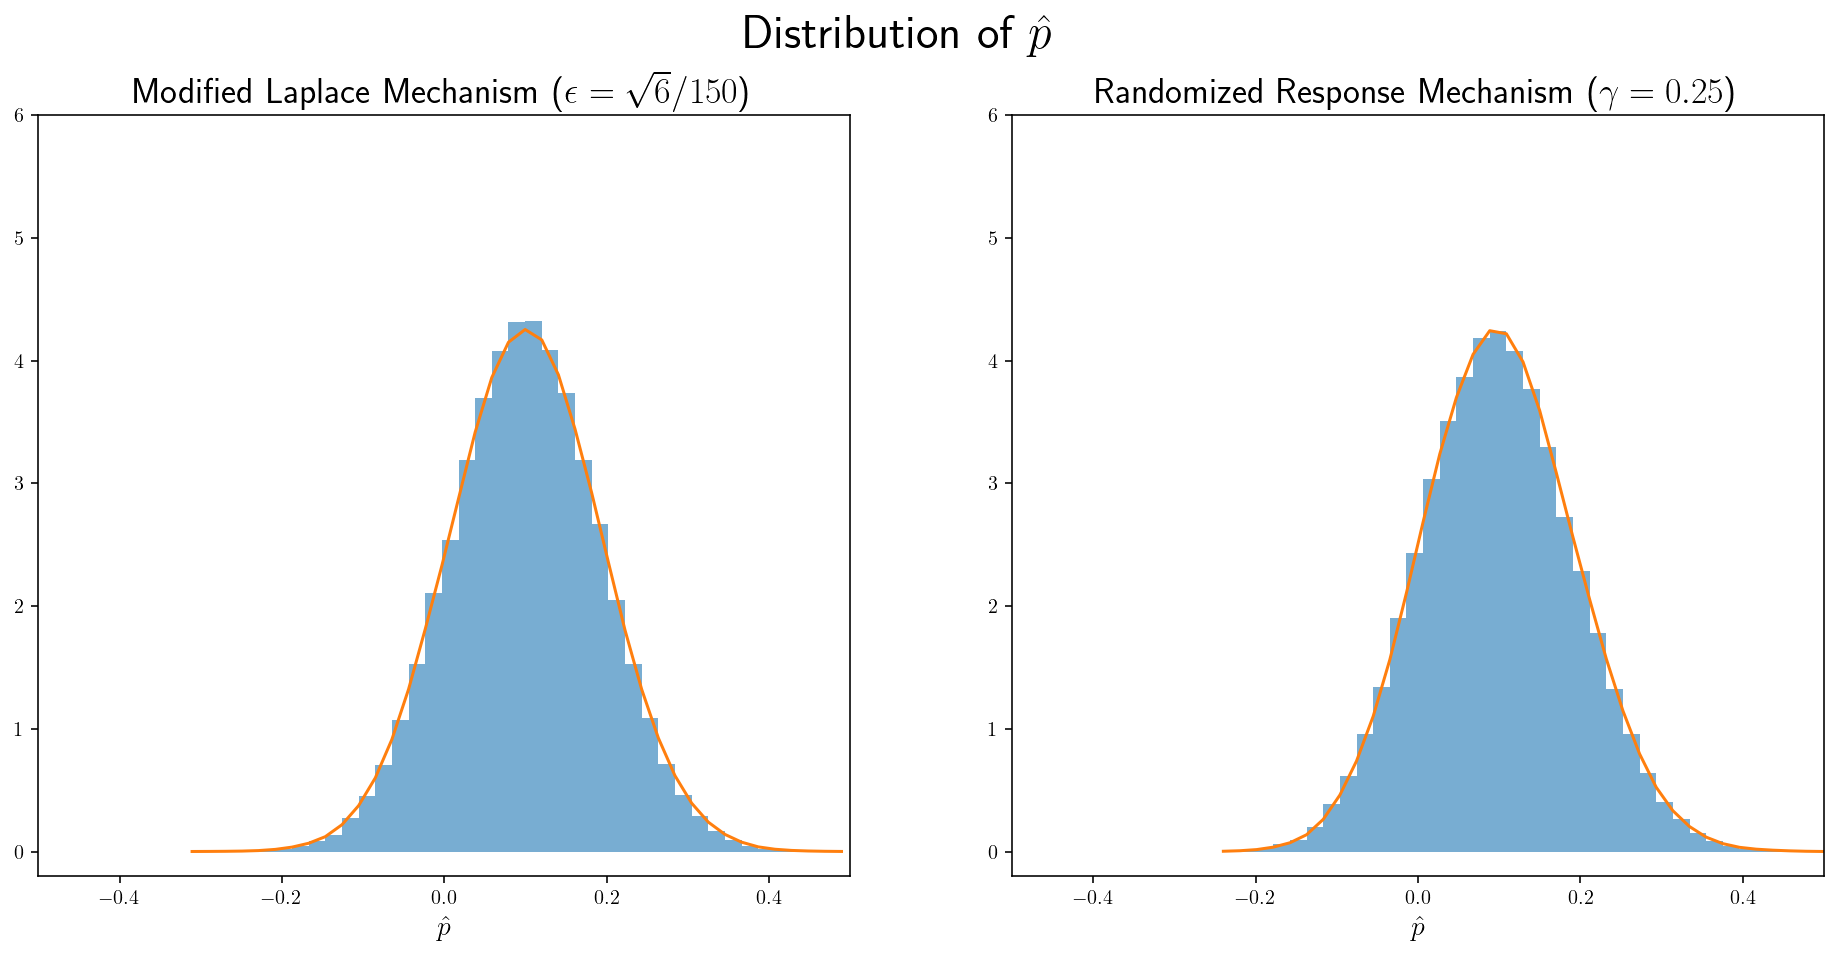

In [111]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of $\hat{p}$', fontsize=24)

# Plot histogram and KDE-smoothed line for Laplace mechanism
kernel_L = stats.gaussian_kde(laplace_data)
kernel_L.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(laplace_data, density=True, bins=39, alpha=0.6)
ax1.set_title('Modified Laplace Mechanism ($\epsilon=\sqrt{6}/150$)', fontsize=18)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.2, 6)
ax1.set_xlabel("$\hat{p}$", fontsize=14)
ax1.plot(x1, kernel_L(x1))

# Plot histogram and KDE-smoothed line for randomized response mechanism
kernel_RRD = stats.gaussian_kde(randomized_response_data)
kernel_RRD.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(randomized_response_data, density=True, bins=39, alpha=0.6)
ax2.set_title('Randomized Response Mechanism ($\gamma=0.25$)', fontsize=18)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.2, 6)
ax2.set_xlabel("$\hat{p}$", fontsize=14)
ax2.plot(x2, kernel_RRD(x2))

We can see that both distributions are centered at $p = 0.1$ and have the same shape. Such beautiful bell curves!

<a id='section4'></a>
## 4. The advantages and drawbacks of differential privacy.

There is no free lunch; differential privacy is not the silver bullet that will resolve all privacy issues without presenting further challenges.

<a id='section4_1'></a>
### 4.1. The drawbacks

- Adding noise a very granular levels of your data, then aggregating across those levels will compound the noise.


- Noised data will often require rounding, which adds a small bias.


- Possible truncation for small values of $X$, which adds more bias (this could be large depending on how small the counts are).


<u>An exercise to see for yourself:</u>

***

**1.** Using the data from example on slide $75$ create the following simulation:

- **(a)** Add Laplace noise to each cell using $\epsilon = 1$ and estimate noised counts $Y = X + \text{noise}$

>    **(i)** Estimate the mean absolute error (MAE) between $Y$ and $X$
>        
>    **(ii)** Estimate the mean absolute error (MAE) between $Y$ and $X$ only for the $(45+, \text{male})$ bin
        
        
- **(b)** Adjust continuous $Y$ to obtain integer $Z$, where $Z =$ `max(round(Y), 0)`
    
>    **(i)** Estimate the mean absolute error (MAE) between $Z$ and $X$
>        
>    **(ii)** Estimate the mean absolute error (MAE) between $Z$ and $X$ only for the $(45+, \text{male})$ bin
        

- **(c)** Repeat $K$ times

    
- **(d)** Plot a histogram of the $K$ MAE terms and comment
    

**2.** Change your value of $\epsilon$ to $0.1$ and repeat $1$

***

<div class="alert alert-block alert-info">
<span style="color:black"><b>1.</b> Create a DataFrame for the data shown on slide $75$ of the lecture slides.</span>
</div>

In [41]:
import pandas as pd

data = pd.DataFrame({
    'age': ['18-24', '18-24', '25-34', '25-34', '35-44', '35-44', '45+', '45+'],
    'gender': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
    'people': [1021, 812, 906, 951, 105, 120, 10, 2]
})

In [42]:
data

,age,gender,people
0,18-24,female,1021
1,18-24,male,812
2,25-34,female,906
3,25-34,male,951
4,35-44,female,105
5,35-44,male,120
6,45+,female,10
7,45+,male,2


<div class="alert alert-block alert-info">
<span style="color:black"><b>2(a).</b> Generate data for $\epsilon=1$.</span>
</div>

In [43]:
def round_noised_people(df):
    '''
    Equivalent of max(round(data['noised_people']), 0).
    
    '''
    if round(df['noised_people']) < 0:
        return 0
    else:
        return round(df['noised_people'])

In [44]:
def add_laplace_noise(df, epsilon):
    df['noised_people'] = df['people'] + np.random.laplace(loc=0, scale=2/epsilon, size=len(df))
    df['rounded_noised_people'] = df.apply(round_noised_people, axis=1)
    return df

In [45]:
def mean_absolute_error(df):
    mae = np.mean(np.abs(df['people'] - df['noised_people']))
    rounded_mae = np.mean(np.abs(df['people'] - df['rounded_noised_people']))
    return {'mae': mae, 'rounded_mae': rounded_mae}

In [46]:
def run_simulation(df, epsilon=1, K=1000):
    mae_list = []
    rounded_mae_list = []
    subset_mae_list = []
    subset_rounded_mae_list = []
    
    for _ in range(K):
        noised_data = add_laplace_noise(df, epsilon)
        MAEs = mean_absolute_error(noised_data)
        mae_list.append(MAEs['mae'])
        rounded_mae_list.append(MAEs['rounded_mae'])
        
        noised_subset_data = noised_data.query('age==\'45+\' & gender==\'male\'')
        MAEs_subset = mean_absolute_error(noised_subset_data)
        subset_mae_list.append(MAEs_subset['mae'])
        subset_rounded_mae_list.append(MAEs_subset['rounded_mae'])
        
    return mae_list, rounded_mae_list, subset_mae_list, subset_rounded_mae_list

In [47]:
mae_list, rounded_mae_list, subset_mae_list, subset_rounded_mae_list = run_simulation(data, epsilon=1, K=1000)

<div class="alert alert-block alert-info">
<span style="color:black"><b>2(b).</b> Plot histograms for $\epsilon=1$.</span>
</div>

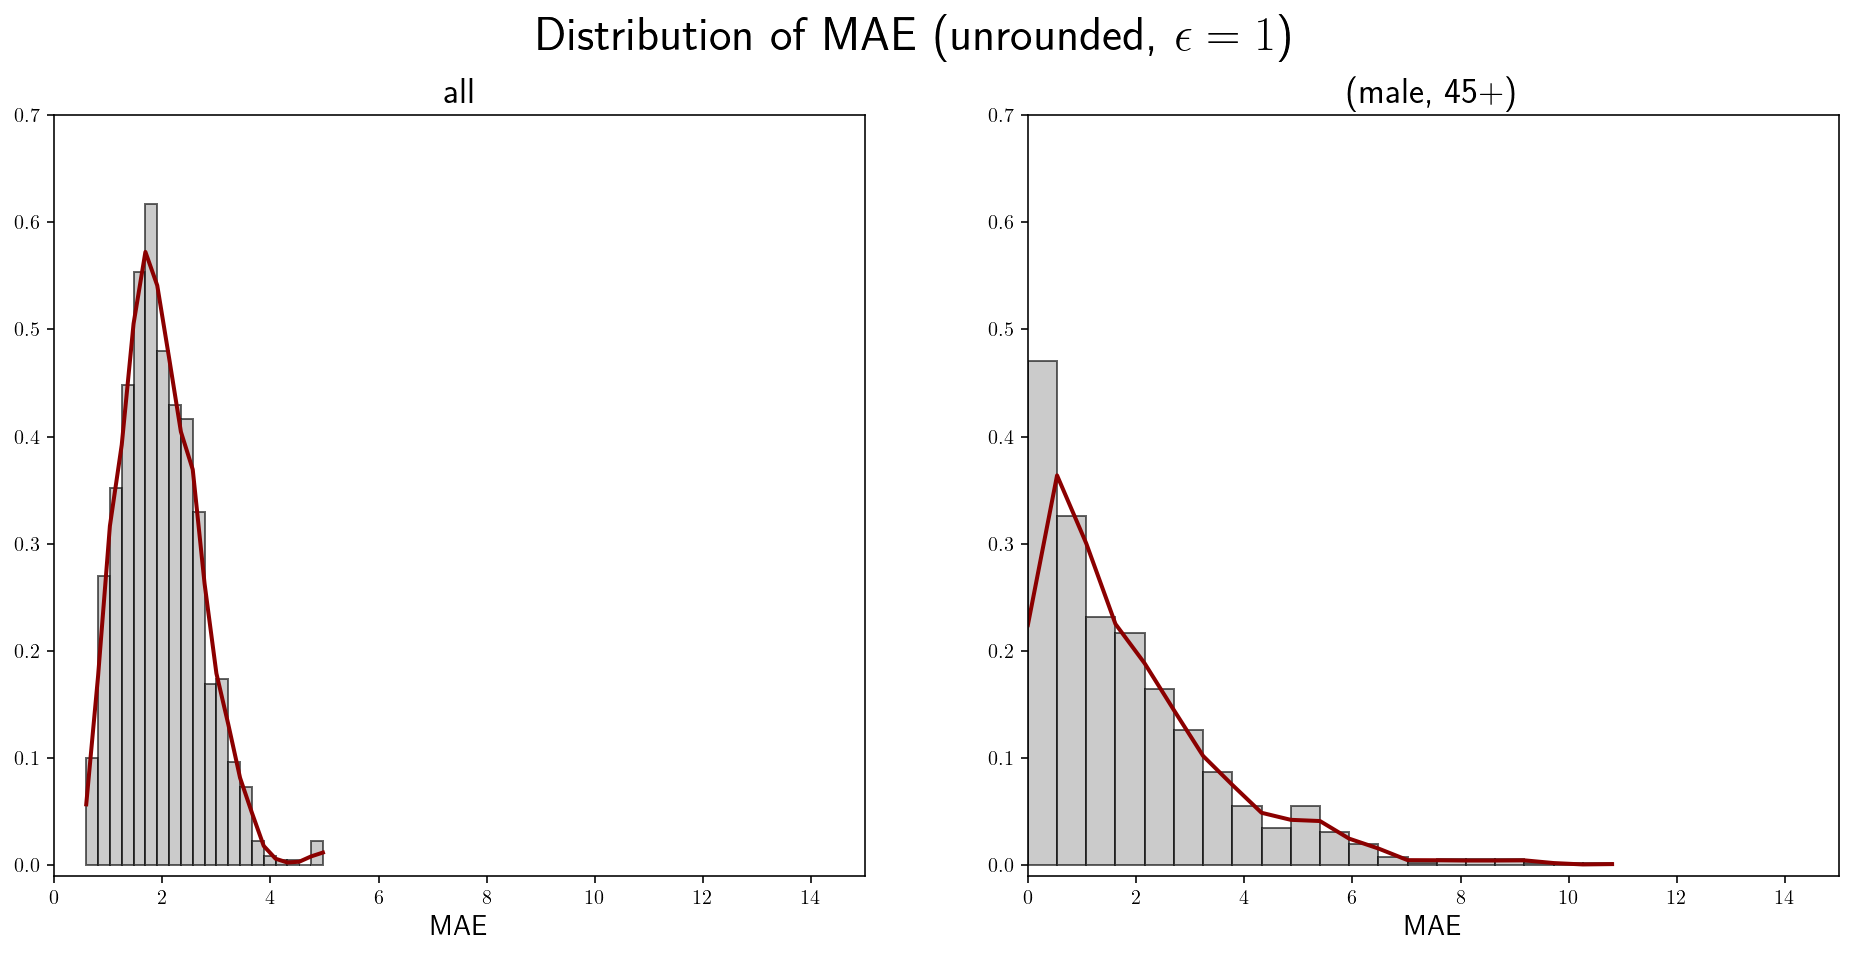

In [48]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of MAE (unrounded, $\epsilon=1$)', fontsize=24)

# Plot histogram and KDE-smoothed line for entire data
kernel = stats.gaussian_kde(mae_list)
kernel.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax1.set_title('all', fontsize=18)
ax1.set_xlim(0, 15)
ax1.set_ylim(-0.01, 0.7)
ax1.set_xlabel("MAE", fontsize=14)
ax1.plot(x1, kernel(x1), linewidth=2, color='darkred')

# Plot histogram and KDE-smoothed line for (45+, male) subset of data
kernel_subset = stats.gaussian_kde(subset_mae_list)
kernel_subset.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(subset_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax2.set_title('(male, 45+)', fontsize=18)
ax2.set_xlim(0, 15)
ax2.set_ylim(-0.01, 0.7)
ax2.set_xlabel("MAE", fontsize=14)
ax2.plot(x2, kernel_subset(x2), linewidth=2, color='darkred')

We can make two observations: 

1. The distribution of the MAE for all $8$ records (left plot) is quite tightly clustered and seems to be centered on about $2$, while


2. the distribution of the MAE for a single record (right plot) is more spread out and seems to have a mode that is between $0$ and $2$.

<br>

These observations can be accounted for. We know that the absolute error (AE) corresponding to each of the $8$ records is the *absolute value* of a realization of a Laplace random variable with location and scale parameter values of $0$ and $2$, respectively. Hence:

<br>

$$\text{MAE} = \frac{1}{N}\sum_{i=1}^N |Y_i| \hspace{1mm},\hspace{5mm} \text{where}\hspace{1mm} Y_i \sim \text{Laplace}\hspace{0.5mm}(\hspace{0.5mm}0, 2\hspace{0.5mm})\hspace{1mm},\hspace{2mm} i \in \{ 1, 2, ..., 8\}$$

<br>

We also know that the probability density function (PDF) of the Laplace distribution is:

<br>

$$f(y\hspace{0.5mm} |\hspace{0.5mm} \mu, b) = \dfrac{1}{2b}\hspace{0.5mm}\exp \left(-\dfrac{|y-\mu|}{b}\right)\hspace{1mm},\hspace{2mm} y\in \mathbb{R}$$

<br>

In this context, we have $\mu=0$, and $b=2$. In this way, the PDF may be simplified to:

<br>

$$f(y) = \dfrac{1}{4}\hspace{0.5mm}\exp \left(-\dfrac{|y|}{2}\right)\hspace{1mm},\hspace{2mm} y\in \mathbb{R}$$

<br>

Looking at the expression for the MAE, it is clear that if we want to obtain its expectation and variance, we would first need to obtain these for $|Y_i|$. 

The expectation of $|Y_i|$ can be computed as follows:

<br>

$$
\begin{align*}
\mathbb{E}\left(|Y_i|\right) &= \int_{-\infty}^{\infty} |y|\hspace{0.5mm} f\left(|y|\right)\hspace{0.5mm}\mathrm{d}y \\[8pt]
&= \int_{-\infty}^{\infty} \frac{|y|}{4}\hspace{0.5mm} \exp \left(-\frac{|y|}{2}\right) \hspace{0.5mm}\mathrm{d}y \\[8pt]
&= 2\int_{0}^{\infty} \frac{y}{4}\hspace{0.5mm} \exp \left(-\frac{y}{2}\right) \hspace{0.5mm}\mathrm{d}y \hspace{1.5cm} (\hspace{1mm}\because \text{integrand is an even function}\hspace{1mm}) \\[8pt]
&= 2\int_{0}^{\infty} z\hspace{0.5mm} \exp \left(-z\right) \hspace{0.5mm}\mathrm{d}z \hspace{1.95cm} (\hspace{1mm} \text{substitute} \hspace{1.5mm} z=y\hspace{0.5mm}/\hspace{0.5mm}2\hspace{1mm}) \\[8pt]
&= 2 \left[ \hspace{0.5mm}(-z-1) \exp(-z) \hspace{0.5mm}\right]_0^\infty \hspace{1.4cm} (\hspace{1mm} \text{integration by parts} \hspace{1mm}) \\[8pt]
&= 2
\end{align*}
$$

<br>

The variance of $|Y_i|$ can be computed as follows:

<br>

$$
\begin{align*}
\text{Var}\hspace{0.2mm}\left(|Y_i|\right) &= \color{DarkBlue}{\mathbb{E}\hspace{0.5mm}(|Y_i|^2)} - \color{Maroon}{\left[\mathbb{E}\hspace{0.5mm}(|Y_i|)\right]^2} \\[5pt]
&= \color{DarkBlue}{\mathbb{E}\hspace{0.5mm}(Y_i^2)} - \color{Maroon}{\left[\mathbb{E}\hspace{0.5mm}(|Y_i|)\right]^2} \\[5pt]
&= \color{DarkBlue}{\text{Var}\hspace{0.2mm}\left(Y_i\right) + \left[\mathbb{E}\hspace{0.5mm}(Y_i)\right]^2} - \color{Maroon}{\left[\mathbb{E}\hspace{0.5mm}(|Y_i|)\right]^2} \\[5pt]
&= \color{DarkBlue}{2\cdot 2^2 + 0^2} - \color{Maroon}{2^2} \\[5pt]
&= 4
\end{align*}
$$

<br>

Now, we can easily obtain the expectation and variance of the MAE:

<br>

$$\mathbb{E}\left(\text{MAE}\right) = \mathbb{E} \left( \frac{1}{N}\sum_{i=1}^N |Y_i|\right) = \mathbb{E} \left( |Y_i| \right) = 2$$

<br>

$$ \text{Var}\hspace{0.2mm} \left(\text{MAE}\right) = \text{Var}\left( \frac{1}{N}\sum_{i=1}^N |Y_i|\right) = \frac{\text{Var}\hspace{0.2mm}\left(|Y_i|\right)}{N} = \frac{4}{N}$$

<br>

Returning to the two observations we made earlier:

1. The distribution of the MAE for the $N=8$ records (left plot) is quite tightly clustered **because its variance has a relatively small value of $0.5$**. Also, it seems to be centered on about $2$ **because that is its expected value**.


2. the distribution of the MAE for a single record (right plot) is more spread out and seems to have a mode that is between $0$ and $2$ (i.e., it does not coincide exactly with the expected value of $2$) **because its variance has a relatively high value of $4$**.

> P.S. The variance of a sample is an indirect measure of the "spread" of the sample's distribution, since its square root is the *standard deviation* of the sample. The standard deviation of a sample measures the degree to which individual observations within the sample differ from the sample mean. 

> P.P.S. A closely related but distinct parameter is the *standard error* of a sample, which measures how distant the sample mean is *likely* to be from the *population mean*.

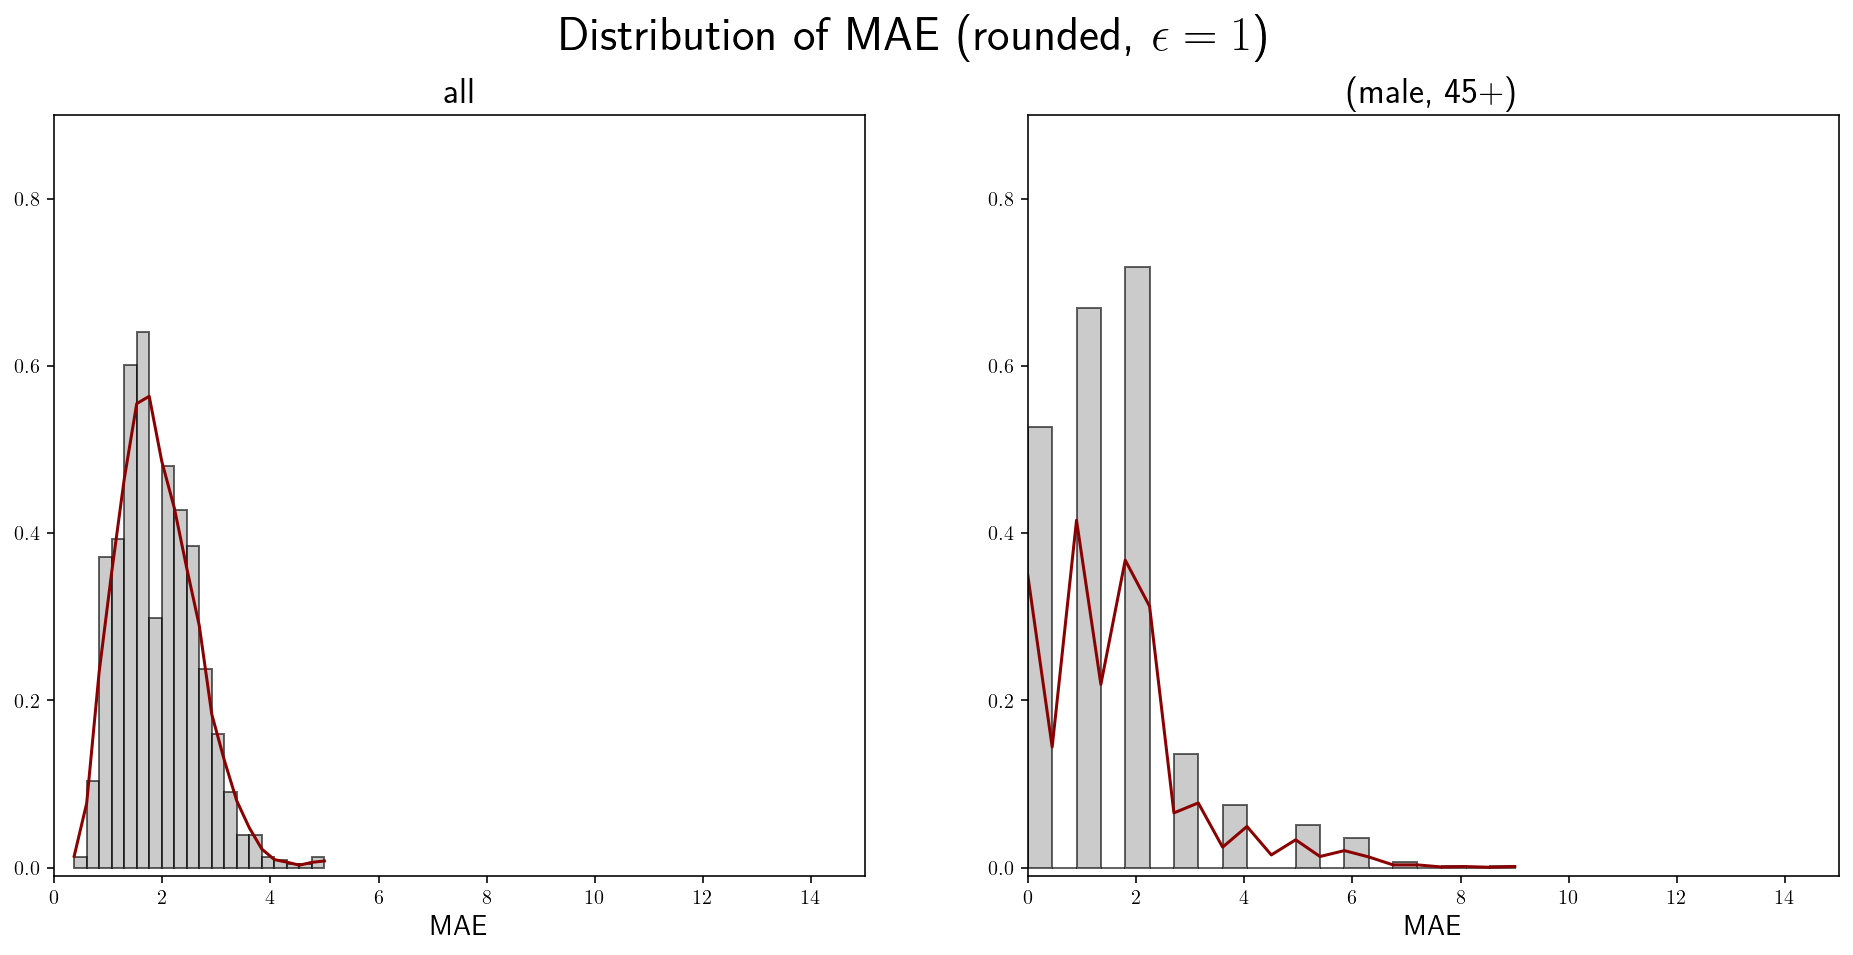

In [49]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of MAE (rounded, $\epsilon=1$)', fontsize=24)

# Plot histogram and KDE-smoothed line for entire data
kernel = stats.gaussian_kde(rounded_mae_list)
kernel.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(rounded_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax1.set_title('all', fontsize=18)
ax1.set_xlim(0, 15)
ax1.set_ylim(-0.01, 0.9)
ax1.set_xlabel("MAE", fontsize=14)
ax1.plot(x1, kernel(x1), color='darkred')

# Plot histogram and KDE-smoothed line for (45+, male) subset of data
kernel_subset = stats.gaussian_kde(subset_rounded_mae_list)
kernel_subset.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(subset_rounded_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax2.set_title('(male, 45+)', fontsize=18)
ax2.set_xlim(0, 15)
ax2.set_ylim(-0.01, 0.9)
ax2.set_xlabel("MAE", fontsize=14)
ax2.plot(x2, kernel_subset(x2), color='darkred')

The main observation we can make here is that compared to the unrounded version, the MAE's distribution here are more discretized and less smooth. This is apparent to a greater extent for the plot on the right $-$ unsurprisingly so, since it corresponds to a sample size\* of $1$. The plot on the left is relatively less discretized because the rounding process was followed by averaging over $8$ samples, which helps smooth out (i.e., reverse the discretization of) the data. 

> \* Note that this refers to $N$, not $K$!  

<div class="alert alert-block alert-info">
<span style="color:black"><b>3.</b> Repeat the above simulations for $\epsilon=0.1$.</span>
</div>

In [50]:
mae_list, rounded_mae_list, subset_mae_list, subset_rounded_mae_list = run_simulation(data, epsilon=0.1, K=1000)

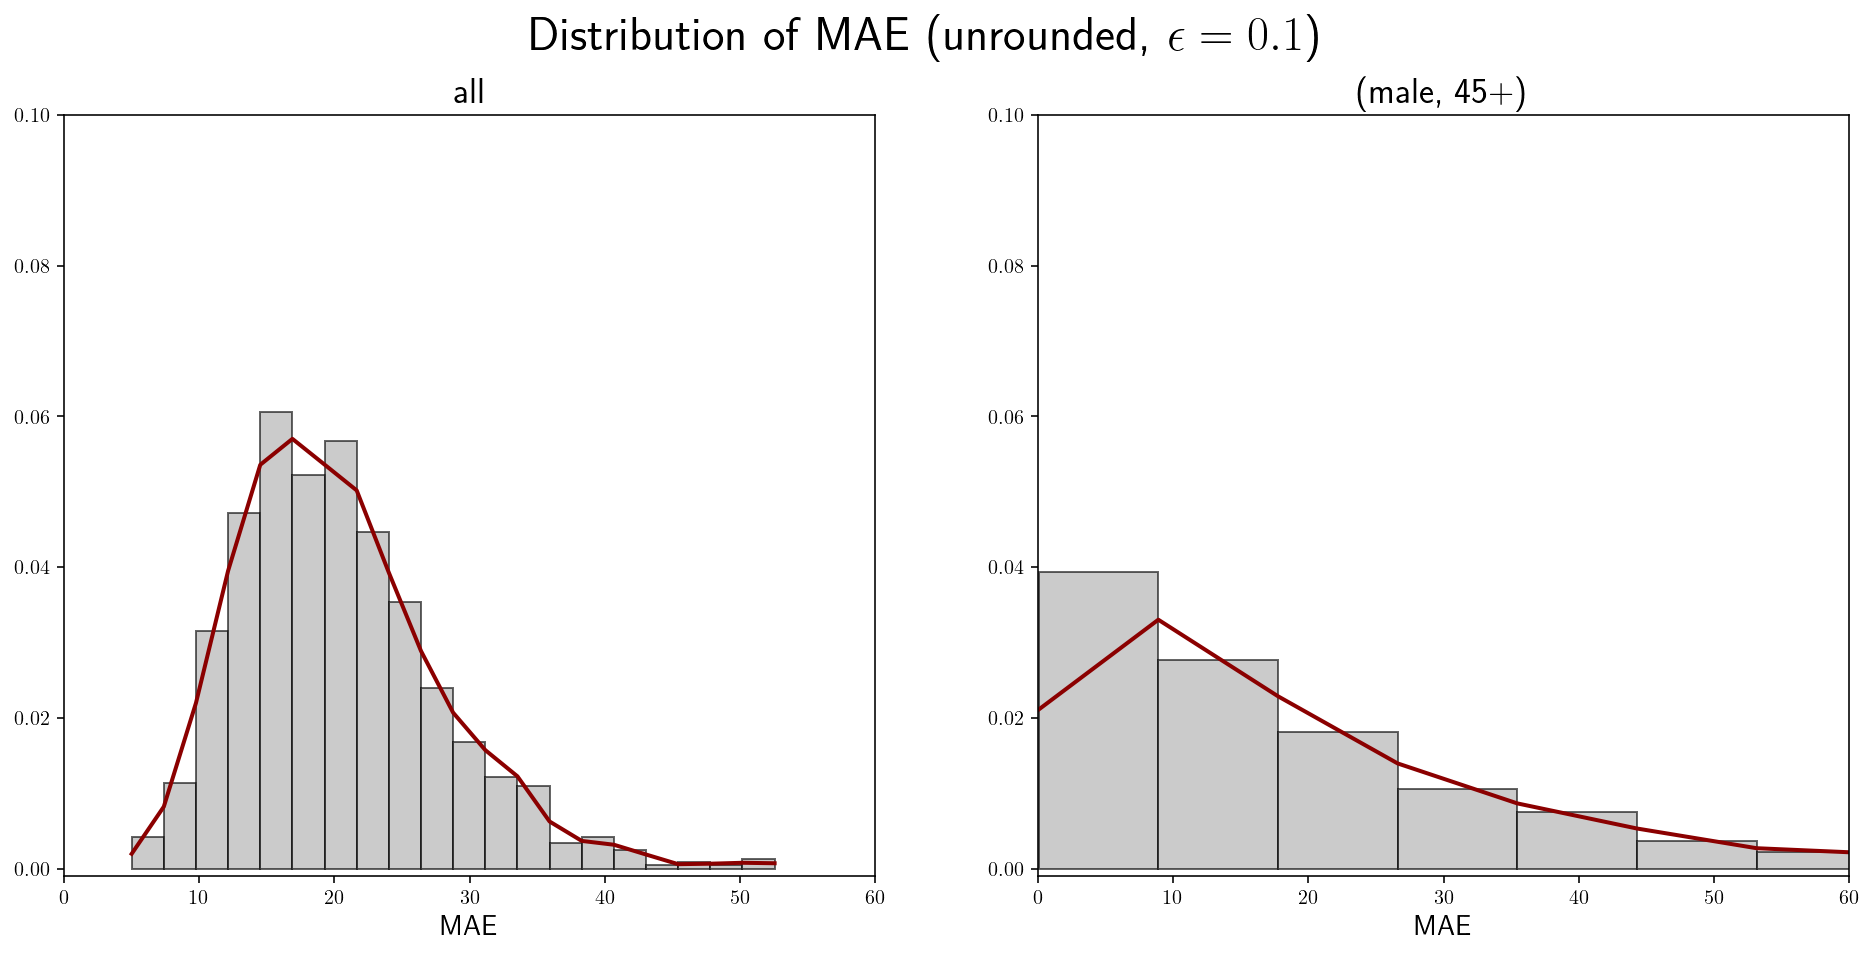

In [51]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of MAE (unrounded, $\epsilon=0.1$)', fontsize=24)

# Plot histogram and KDE-smoothed line for entire data
kernel = stats.gaussian_kde(mae_list)
kernel.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax1.set_title('all', fontsize=18)
ax1.set_xlim(0, 60)
ax1.set_ylim(-0.001, 0.1)
ax1.set_xlabel("MAE", fontsize=14)
ax1.plot(x1, kernel(x1), linewidth=2, color='darkred')

# Plot histogram and KDE-smoothed line for (45+, male) subset of data
kernel_subset = stats.gaussian_kde(subset_mae_list)
kernel_subset.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(subset_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax2.set_title('(male, 45+)', fontsize=18)
ax2.set_xlim(0, 60)
ax2.set_ylim(-0.001, 0.1)
ax2.set_xlabel("MAE", fontsize=14)
ax2.plot(x2, kernel_subset(x2), linewidth=2, color='darkred')

Given the new value of $\epsilon$, we now have $b=20$. So, the PDF of the Laplace random variable would now be:

<br>

$$f(y) = \dfrac{1}{40}\hspace{0.5mm}\exp \left(-\dfrac{|y|}{20}\right)\hspace{1mm},\hspace{2mm} y\in \mathbb{R}$$

<br>

By the same mathematical procedure shown before with the original value of $\epsilon$, the new expectation of $|Y_i|$ is given by:

<br>

$$\mathbb{E}\left(|Y_i|\right) = 20$$

<br>

Similarly, the new variance of $|Y_i|$ is given by:

<br>

$$\text{Var}\hspace{0.2mm}\left(|Y_i|\right) = 400$$

<br>

As before, we can then easily obtain the expectation and variance of the new MAE:

<br>

$$\mathbb{E}\left(\text{MAE}\right) = 20$$

<br>

$$ \text{Var}\hspace{0.2mm} \left(\text{MAE}\right) = \frac{400}{N}$$

<br>

This is consistent with what we see in the two plots above:


1. The distribution of the MAE for the  $N=8$  records (left plot) is clustered more tightly compared to the distribution in the right plot and less tightly compared to when $\epsilon=1$. The latter observation can be explained by the fact that its variance is now $50$, which is noticeably greater than $0.5$. (The former observation is explained in the next paragraph.) Also, it seems to be centered on about $20$ because that is its new expected value.


2. The distribution of the MAE for a single record (right plot) is more spread out compared to the distribution in the left plot *and* when $\epsilon=1$. It also seems to have a mode that is between $0$ and $20$  (i.e., it does not coincide exactly with the expected value of $20$). This is because its variance has a relatively high value of $400$.

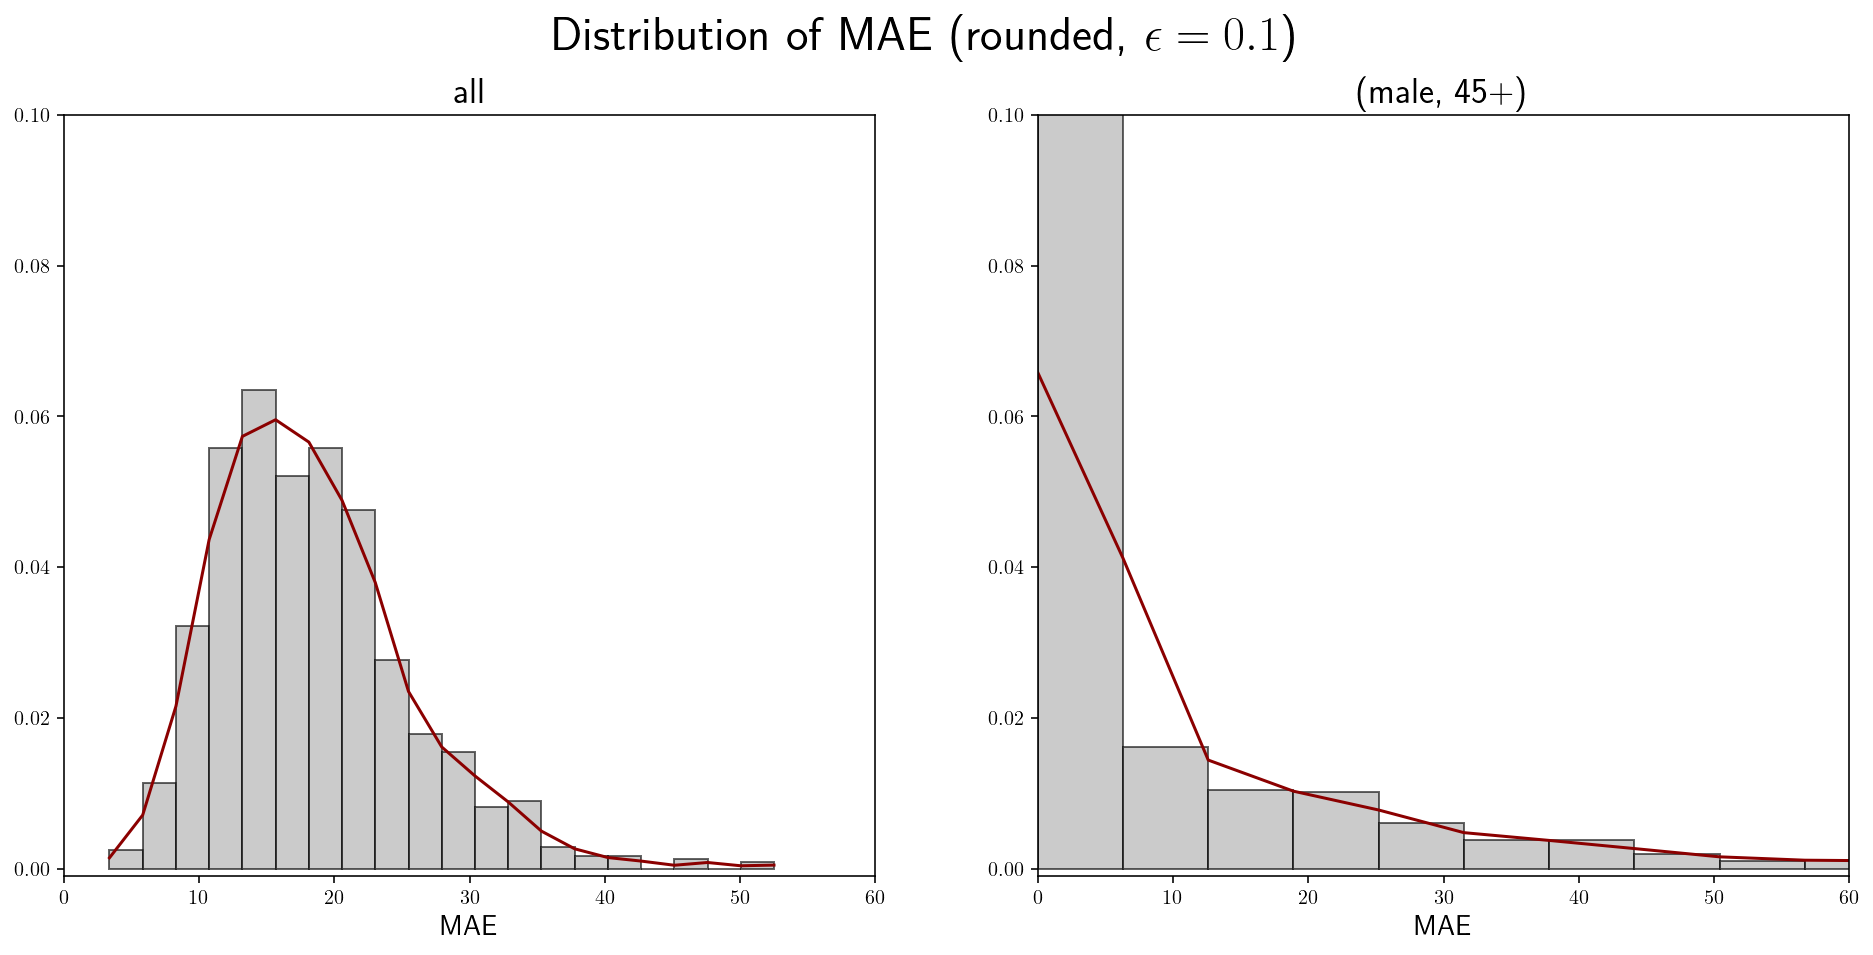

In [52]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of MAE (rounded, $\epsilon=0.1$)', fontsize=24)

# Plot histogram and KDE-smoothed line for entire data
kernel = stats.gaussian_kde(rounded_mae_list)
kernel.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(rounded_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax1.set_title('all', fontsize=18)
ax1.set_xlim(0, 60)
ax1.set_ylim(-0.001, 0.1)
ax1.set_xlabel("MAE", fontsize=14)
ax1.plot(x1, kernel(x1), color='darkred')

# Plot histogram and KDE-smoothed line for (45+, male) subset of data
kernel_subset = stats.gaussian_kde(subset_rounded_mae_list)
kernel_subset.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(subset_rounded_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax2.set_title('(male, 45+)', fontsize=18)
ax2.set_xlim(0, 60)
ax2.set_ylim(-0.001, 0.1)
ax2.set_xlabel("MAE", fontsize=14)
ax2.plot(x2, kernel_subset(x2), color='darkred')

Again, compared to the unrounded version, the MAE's distribution here are more discretized and less smooth. (To a greater extent for the plot on the right too, since it corresponds to a sample size of $1$.) 


Nonetheless, a new observation we could make is that the distribution in the right plot seems highly skewed towards $0$. This can be explained by the fact that the variance of the Laplace noise is now noticeably higher (by an order of magnitude of $100$), which means that there would be a higher proportion of highly negative values sampled (i.e., negative relative to the counts in the data; so adding the highly negative noise to these counts would result in more net-negative noised counts). But because of the rounding process $-$ `max(round(noised_counts), 0)` $-$ these negative noised counts would translate into MAE values that are positive but close to $0$.

<a id='section4_2'></a>
### 4.2. The advantages

One of the reasons for the success of differential privacy is its simplicity and its “user-friendliness”. (Compared to complex anonymization techniques and rules on queries?)

DP also offers: 

- Robustness to **post-processing**

> The idea: It is impossible to reverse the protection that a differential private mechanism provides by processing the output in further ways. Hence, there is no danger of reversing the privacy protection when performing arbitrary computations on the output of a differentially private mechanism.

> If $f(x)$ satisfies $\epsilon$-differential privacy, then for any function $g$, $g(f(x))$ satisfies $\epsilon$-differential privacy.


- Closure under **group privacy** 

> The idea: Applying an $\epsilon$-differentially private mechanism $\mathcal{M}$ to neighboring datasets that differ in not just one but multiple entries can still preserve privacy.

> Suppose $D$ and $D′$ are two datasets which differ in exactly $k$ positions. Then, $\mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D) \in S] \leq \exp (k\epsilon ) \hspace{2mm} \mathrm{Pr}\hspace{0.7mm}[ \mathcal{M}(D') \in S]$

- Closure under **composition**

> The idea: Suppose $M = (M_1, ..., M_k)$ is a sequence of $\epsilon$-differentially private mechanisms. Then, $M$ is $(k\epsilon)$-differentially private.

<u>An exercise to witness robustness under post-processing:</u>

***

Using the data from example on slide $75$ create the following simulation:

**1.** Add Laplace noise to each cell using $\epsilon = 1$ and estimate noised counts $Y = X + \text{noise}$


**2.** Aggregate the counts $X$ and noised counts $Y$ by gender (across age) 

>    **(a)** Estimate the mean absolute error (MAE) between $Y$ and $X$
>        
>    **(b)** Estimate the mean absolute error (MAE) between $Y$ and $X$ only for the $(\text{male})$ bin
        
        
**3.** Adjust continuous $Y$ to obtain integer $Z$, where $Z =$ `max(round(Y), 0)`
    
>    **(a)** Estimate the mean absolute error (MAE) between $Z$ and $X$
>        
>    **(b)** Estimate the mean absolute error (MAE) between $Z$ and $X$ only for the $(\text{male})$ bin
        

**4.** Repeat $K$ times

    
**5.** Plot a histogram of the $K$ MAE terms and comment $-$ in particular, compare to the histograms you created in Exercise $3$

***

<div class="alert alert-block alert-info">
<span style="color:black"><b>1.</b> Create a DataFrame for the data shown on slide $75$ of the lecture slides.</span>
</div>

In [53]:
data = pd.DataFrame({
    'age': ['18-24', '18-24', '25-34', '25-34', '35-44', '35-44', '45+', '45+'],
    'gender': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
    'people': [1021, 812, 906, 951, 105, 120, 10, 2]
})

In [54]:
data

,age,gender,people
0,18-24,female,1021
1,18-24,male,812
2,25-34,female,906
3,25-34,male,951
4,35-44,female,105
5,35-44,male,120
6,45+,female,10
7,45+,male,2


<div class="alert alert-block alert-info">
<span style="color:black"><b>2.</b> Generate data for $\epsilon=1$.</span>
</div>

In [55]:
def round_noised_people(df):
    '''
    Equivalent of max(round(data['noised_people']), 0).
    
    '''
    if round(df['noised_people']) < 0:
        return 0
    else:
        return round(df['noised_people'])

In [56]:
def add_laplace_noise(df, epsilon):
    df['noised_people'] = df['people'] + np.random.laplace(loc=0, scale=2/epsilon, size=len(df))
    df['rounded_noised_people'] = df.apply(round_noised_people, axis=1)
    return df

In [57]:
def mean_absolute_error(df):
    mae = np.mean(np.abs(df['people'] - df['noised_people']))
    rounded_mae = np.mean(np.abs(df['people'] - df['rounded_noised_people']))
    return {'mae': mae, 'rounded_mae': rounded_mae}

In [58]:
def run_simulation(df, epsilon=1, K=1000):
    mae_list = []
    rounded_mae_list = []
    male_mae_list = []
    male_rounded_mae_list = []
    
    for _ in range(K):
        # Get aggregated data
        noised_data = add_laplace_noise(df, epsilon)
        noised_data_gender = noised_data.groupby('gender')\
                                        .agg({'people': 'sum', 
                                              'noised_people': 'sum', 
                                              'rounded_noised_people': 'sum'
                                             })\
                                        .reset_index()
        
        # Get MAE
        MAEs = mean_absolute_error(noised_data_gender)
        mae_list.append(MAEs['mae'])
        rounded_mae_list.append(MAEs['rounded_mae'])
        
        # Get MAE for (male) bin
        noised_data_male = noised_data_gender.query('gender==\'male\'')
        MAEs_male = mean_absolute_error(noised_data_male)
        male_mae_list.append(MAEs_male['mae'])
        male_rounded_mae_list.append(MAEs_male['rounded_mae'])
        
    return mae_list, rounded_mae_list, male_mae_list, male_rounded_mae_list

In [59]:
mae_list, rounded_mae_list, male_mae_list, male_rounded_mae_list = run_simulation(data, epsilon=1, K=50000)

<div class="alert alert-block alert-info">
<span style="color:black"><b>2(b).</b> Plot histograms.</span>
</div>

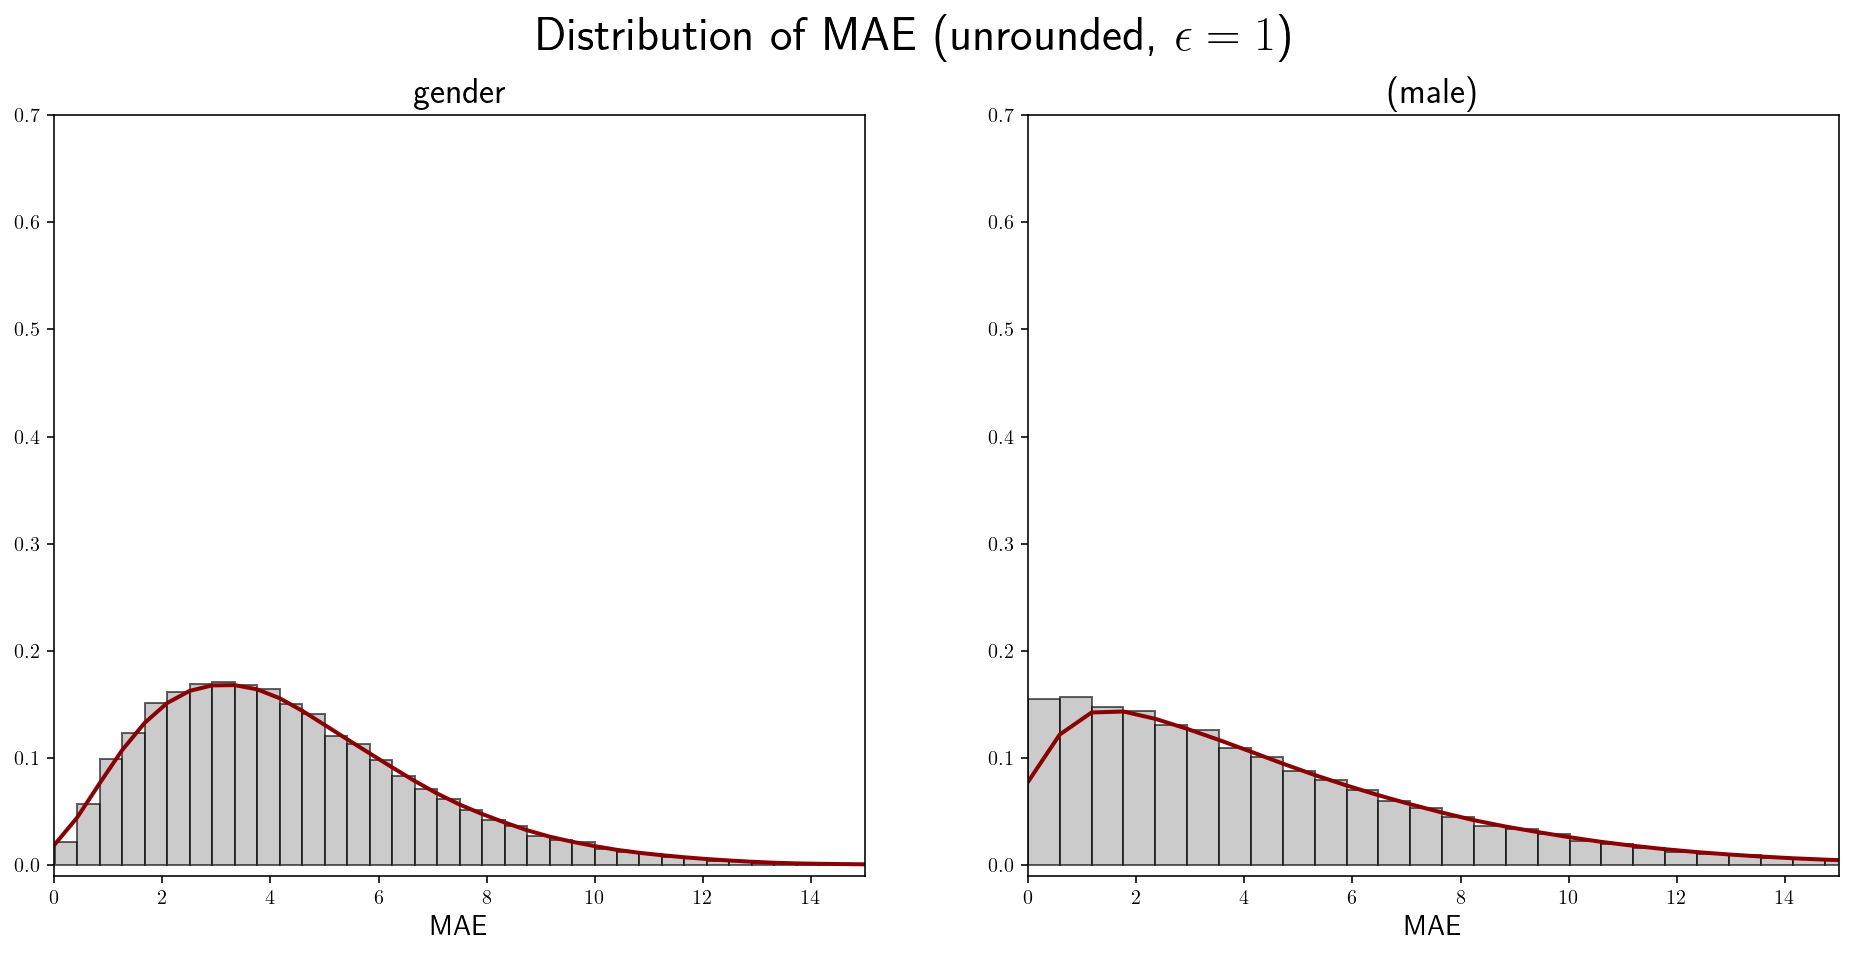

In [60]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of MAE (unrounded, $\epsilon=1$)', fontsize=24)

# Plot histogram and KDE-smoothed line for entire data
kernel = stats.gaussian_kde(mae_list)
kernel.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(mae_list, density=True, bins=50, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax1.set_title('gender', fontsize=18)
ax1.set_xlim(0, 15)
ax1.set_ylim(-0.01, 0.7)
ax1.set_xlabel("MAE", fontsize=14)
ax1.plot(x1, kernel(x1), linewidth=2, color='darkred')

# Plot histogram and KDE-smoothed line for (male) subset of data
kernel_subset = stats.gaussian_kde(male_mae_list)
kernel_subset.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(male_mae_list, density=True, bins=50, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax2.set_title('(male)', fontsize=18)
ax2.set_xlim(0, 15)
ax2.set_ylim(-0.01, 0.7)
ax2.set_xlabel("MAE", fontsize=14)
ax2.plot(x2, kernel_subset(x2), linewidth=2, color='darkred')

We can make two observations: 

1. The distribution of the MAE for both plots are visibly more spread out than those in Exercise $3$.


2. The distribution of the MAE for a single aggregated record (right plot) is more spread out compared to that for the two aggregated records (left plot).

<br>

These observations can be accounted for. We know that the absolute error (AE) corresponding to each of the $2$ aggregated records is the absolute value of a realization of *some* random variable that is the sum of $4$ i.i.d. Laplace random variables (each with location and scale parameter values of $0$ and $2$, respectively). Without loss of generality, let us define the random variables for the aggregated records as follows:

<br>

$$Y_\text{male} = Y_1 + Y_2 + Y_3 + Y_4$$

$$Y_\text{female} = Y_5 + Y_6 + Y_7 + Y_8$$

<br>

where $Y_i \sim \text{Laplace}\hspace{0.5mm}(\hspace{0.5mm}0, 2\hspace{0.5mm})\hspace{1mm},\hspace{2mm} i \in \{ 1, 2, ..., 8\}$. (Note that $Y_\text{male}$ and $Y_\text{female}$ are independent and identically distributed.) The MAEs of interest can then be expressed as:

<br>

$$\text{MAE}_\text{gender} = \frac{|Y_\text{male}| + |Y_\text{female}|}{2}$$

$$\text{MAE}_\text{male} = |Y_\text{male}| $$

<br>

Looking at the expressions for the MAEs, it is clear that if we want to obtain their expectations and variances, we would first need to obtain these for either $|Y_\text{male}|$ or $|Y_\text{female}|$. 

**The bad news:** The author's attempt at obtaining the numerical value of $\mathbb{E}\left(|Y_\text{male}|\right)$ by hand did not yield any fruit, despite his having spent literally an entire day on it. The author's approach was to convolve the densities of the Laplace random variables, then perform an integration to get the expectation of $|Y_\text{male}|$.\*

> \* Turns out that the author actually managed to succeed with this approach with the help of `scipy`, but thought that the result was wrong and deleted the code cell...


**The good news:** It turns out that the answer is already on the internet (just required a bit of piecing things together)! The key idea is to conceive of $Y_\text{male}$ as the difference of two i.i.d. Gamma (specifically, Erlang) distributions. How does this work?


First, any zero-centered Laplace random variable $Y \sim \text{Laplace}\hspace{0.5mm}(\hspace{0.5mm}0, b\hspace{0.5mm})$ may be expressed as the difference of two i.i.d. exponential random variables $W_1$ and $W_2$, where $W_i \sim \text{Exponential}\hspace{0.5mm}(\hspace{0.5mm}0, b^{-1}\hspace{0.5mm})$. (Note that $b^{-1}$ here is the *rate* parameter.) Further, the sum of $k$ i.i.d. Exponential random variables $-$ each with a *scale* parameter of $\theta=b\hspace{1mm} - $ would be a Gamma random variable $Z$ with shape $k$ and scale $\theta$. Therefore, we may write

<br>

$$Y_\text{male} = Z_1 - Z_2 \hspace{1mm},\hspace{5mm} \text{where}\hspace{1mm} Z_i \sim \text{Gamma}\hspace{0.5mm}(\hspace{0.5mm}k = 4, \theta = 2\hspace{0.5mm})\hspace{1mm},\hspace{2mm} i \in \{ 1, 2\}$$

<br>

Now, it turns out that $\mathbb{E}\left( |Y_\text{male}|\right) = \mathbb{E}\left( |Z_1 - Z_2|\right)$ is essentially what is known as the *mean absolute difference* of $Z_1$ and $Z_2$. We are also fortunate that a formula for the mean absolute difference of two i.i.d. Gamma random variables is provided [here](https://en.wikipedia.org/wiki/Mean_absolute_difference#Examples) and [here](https://stats.stackexchange.com/questions/508992/mean-absolute-difference-for-the-gamma-distribution). Just to be clear, the formula is:

<br>

$$\text{mean absolute difference}\hspace{0.5mm}(Z_1, Z_2) \hspace{1mm}=\hspace{1mm} k\theta \hspace{0.5mm}\left[\hspace{0.5mm}2 - 4I_{0.5}(k+1, k)\hspace{0.5mm}\right]$$

<br>

where $I_x(a, b)$ is the [regularized incomplete beta function](https://en.wikipedia.org/wiki/Beta_function#Incomplete_beta_function).

<br>

We may therefore compute the value of $\mathbb{E}\left(|Y_\text{male}|\right)$ as follows: 

In [61]:
import scipy.special as sc

k = 4
theta = 2
I = sc.betainc(k+1, k, 0.5)
expectation = k*theta*(2-4*I)
print("Expectation of |Y_male| : ", expectation)

Expectation of |Y_male| :  4.3749999999999964


Moreover, the variance of $|Y_\text{male}|\hspace{0.5mm} - $ which is what we really care about here (since it measures the histograms' spread) $-$ can be expressed as a simple function of its expectation. Here's how:


First, we note that $\mathbb{E}\left(Y_\text{male}\right) = 4 \cdot \mathbb{E}\left(Y_i\right) = 0$. We can then write


$$
\begin{align*}
\text{Var}\hspace{0.2mm}\left(Y_\text{male}\right) &= \sum_{i=1}^4 \text{Var}\hspace{0.2mm}\left(Y_i\right) \\[8pt] 
&= 32 \\[8pt]
&= \mathbb{E}\left(Y_\text{male}^2\right)
\end{align*}
$$

<br>

The variance of $|Y_\text{male}|$ can subsequently be expressed as:

<br>

$$
\begin{align*}
\text{Var}\hspace{0.2mm}\left(|Y_\text{male}|\right) &= \color{DarkBlue}{\mathbb{E}\hspace{0.5mm}(|Y_\text{male}|^2)} - \color{Maroon}{\left[\mathbb{E}\hspace{0.5mm}(|Y_\text{male}|)\right]^2} \\[5pt]
&= \color{DarkBlue}{\mathbb{E}\hspace{0.5mm}(Y_\text{male}^2)} - \color{Maroon}{\left[\mathbb{E}\hspace{0.5mm}(|Y_\text{male}|)\right]^2} \\[5pt]
&= \color{DarkBlue}{32} - \color{Maroon}{\left[\mathbb{E}\hspace{0.5mm}(|Y_\text{male}|)\right]^2}
\end{align*}
$$

<br>

Substituting $\mathbb{E}\hspace{0.5mm}(|Y_\text{male}|) \approx 4.375$ into the above expression, the variance of $|Y_\text{male}|$ would then be about $12.86$. This would mean that 

<br>

$$ \text{Var}\hspace{0.2mm} \left(\text{MAE}_\text{male}\right) \approx 12.8 \hspace{10mm} \text{and} \hspace{10mm} \text{Var}\hspace{0.2mm} \left(\text{MAE}_\text{gender}\right) \approx 6.4$$

<br>

Since these values are higher than the variances obtained in Exercise $3$, it is therefore not surprising that the spread of the distribution of the MAEs in this case is greater. Moreover, since $\text{Var}\hspace{0.2mm} \left(\text{MAE}_\text{male}\right) > \text{Var}\hspace{0.2mm} \left(\text{MAE}_\text{gender}\right)$, it is then also unsurprising that the right plot displayed a greater spread than the left plot.

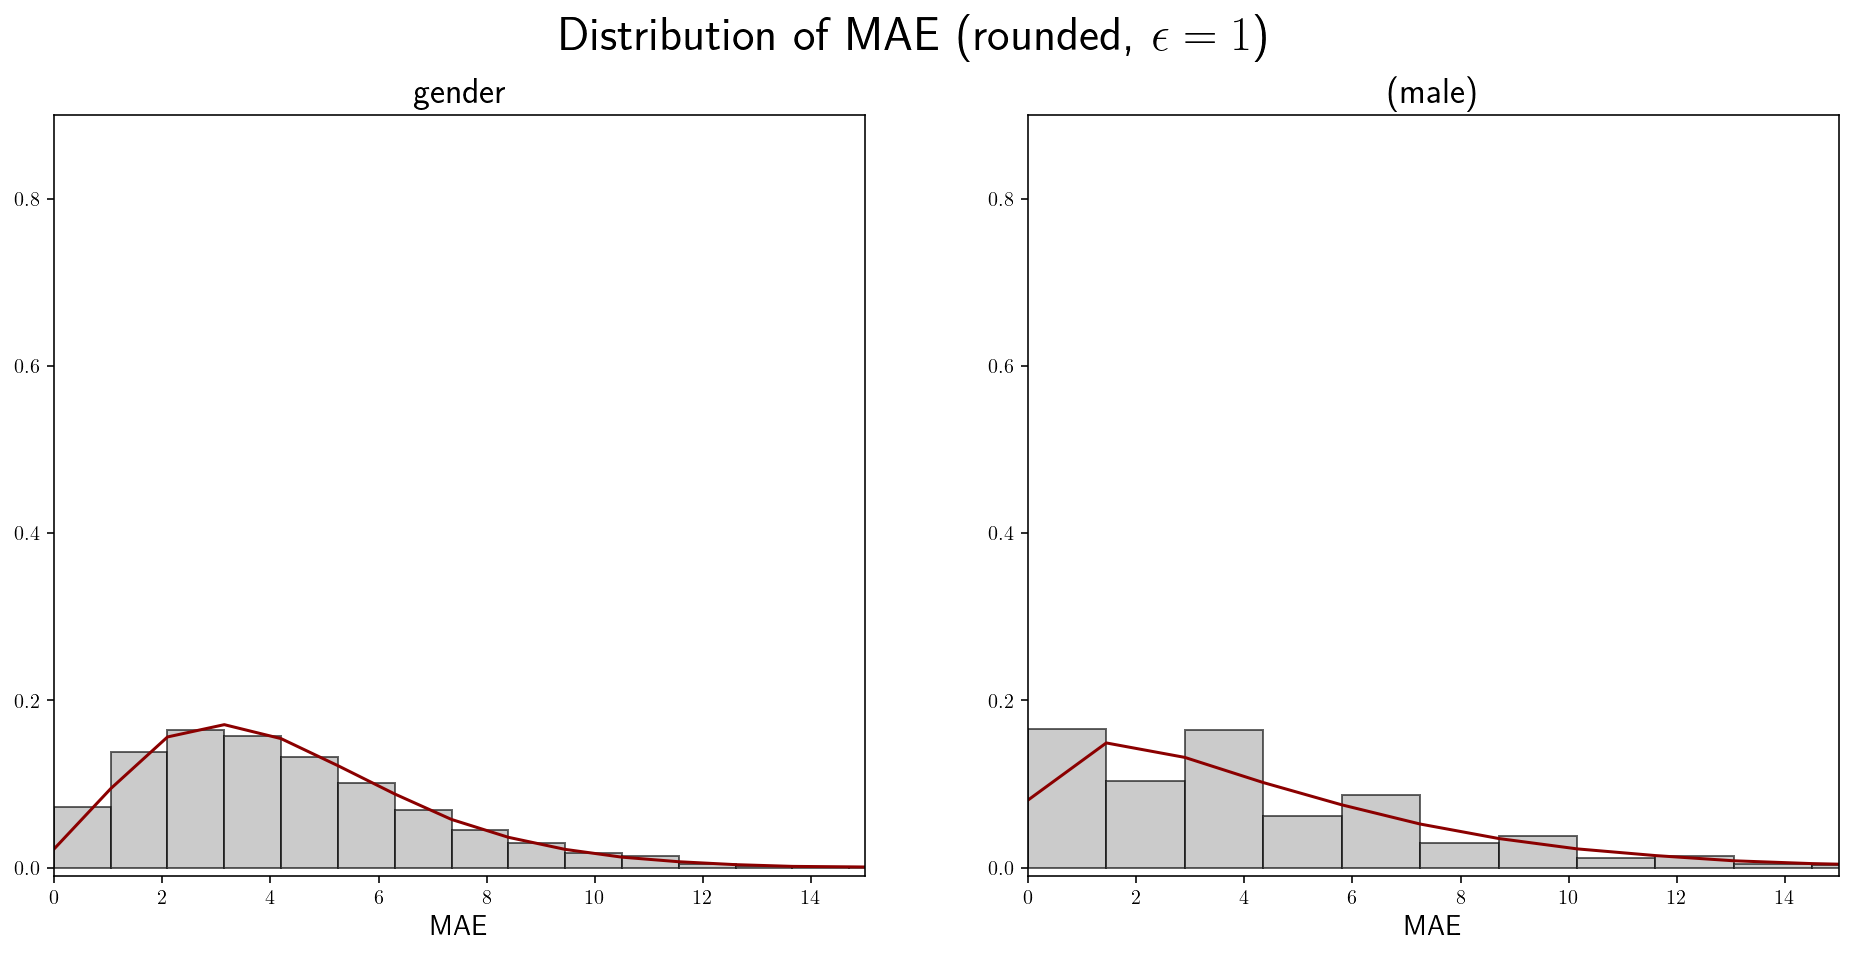

In [62]:
# Create figure and main title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Distribution of MAE (rounded, $\epsilon=1$)', fontsize=24)

# Plot histogram and KDE-smoothed line for entire data
kernel = stats.gaussian_kde(rounded_mae_list)
kernel.set_bandwidth(bw_method=0.2)
_, x1, _ = ax1.hist(rounded_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax1.set_title('gender', fontsize=18)
ax1.set_xlim(0, 15)
ax1.set_ylim(-0.01, 0.9)
ax1.set_xlabel("MAE", fontsize=14)
ax1.plot(x1, kernel(x1), color='darkred')

# Plot histogram and KDE-smoothed line for (45+, male) subset of data
kernel_subset = stats.gaussian_kde(male_rounded_mae_list)
kernel_subset.set_bandwidth(bw_method=0.2)
_, x2, _ = ax2.hist(male_rounded_mae_list, density=True, bins=20, alpha=0.6, color="darkgrey", lw=1, edgecolor='black')
ax2.set_title('(male)', fontsize=18)
ax2.set_xlim(0, 15)
ax2.set_ylim(-0.01, 0.9)
ax2.set_xlabel("MAE", fontsize=14)
ax2.plot(x2, kernel_subset(x2), color='darkred')

The main observation we can make here is that compared to the unrounded version, the MAE's distribution here are more discretized and less smooth. This is apparent to a slightly greater extent for the plot on the right $-$ unsurprisingly so, since it corresponds to a sample size of $1$. The plot on the left is relatively less discretized because the rounding process was followed by averaging over $2$ samples, which helps smooth out the data slightly.

<a id='conclusion'></a>
### Conclusion

For a superb introduction to Differential Privacy, read [this blog article](https://www.borealisai.com/research-blogs/tutorial-12-differential-privacy-i-introduction/) written by researchers at Borealis AI. Much of this work took inspiration from the article.

[This](https://programming-dp.com/index.html) is another great resource.

---

<div class="alert alert-block alert-success">
    
<b><center> End of Notebook <b>
